In [3]:
from IPython.display import display

import pandas as p
execlFilePath="C:\drugsComTest_raw.csv"
df=p.read_csv(execlFilePath)
# Set display option to show all columns
p.set_option('display.max_columns', None)

# Print the DataFrame
df_subset = df.drop(columns=['review'])

# Display the first 20 rows of the DataFrame excluding the "review" column
display(df_subset.head(20))
# Reset display option to its default value if needed
p.reset_option('display.max_columns')


,uniqueID,drugName,condition,rating,date,usefulCount
0,163740,Mirtazapine,Depression,10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,9,29-Sep-17,3
3,39293,Contrave,Weight Loss,9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,9,22-Oct-15,4
5,208087,Zyclara,Keratosis,4,3-Jul-14,13
6,215892,Copper,Birth Control,6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,7,18-Oct-16,21
9,71428,Levora,Birth Control,2,16-Apr-11,3


In [10]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Check for variations in naming for the condition 'Depression'
depression_variations = df[df['condition'].str.lower().str.contains('depression', na=False)]

# Check for missing values in the 'condition' column
missing_condition_entries = df[df['condition'].isnull()]

# Display the counts for each case
print(f"Number of variations for 'Depression': {len(depression_variations)}")
print(f"Number of missing condition entries: {len(missing_condition_entries)}")

# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by condition and calculate aggregate statistics
condition_stats = df.groupby('condition').agg({
    'uniqueID': 'count',  # Count of reviews
    'rating': 'mean'      # Average rating
})

# Rename columns for clarity
condition_stats.rename(columns={'uniqueID': 'count_person', 'rating': 'average_rating'}, inplace=True)

# Sort conditions by review count in descending order
condition_stats = condition_stats.sort_values(by='count_person', ascending=False)

# Display the top conditions
top_conditions = condition_stats.head(50)  # You can adjust the number as needed
display(top_conditions)


Number of variations for 'Depression': 3125
Number of missing condition entries: 295


,review_count,average_rating
condition,,
birth control,9648,6.042289
depression,3095,7.104039
pain,2100,7.582857
anxiety,1908,7.680818
acne,1847,7.368706
bipolar disorde,1380,7.021014
weight loss,1248,7.973558
insomnia,1231,6.597888
obesity,1189,7.689655


In [12]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Check for missing values in the 'condition' column for 'Depression'
depression_null_count = df[df['condition'].notnull()]['condition'].str.lower().str.contains('depression').sum()
print(f"Number of null values for 'Depression': {depression_null_count}")


Number of null values for 'Depression': 3125


In [13]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Assuming your DataFrame is named 'df'
# Group by condition and calculate aggregate statistics
condition_stats = df.groupby('condition').agg({
    'uniqueID': 'count',  # Count of reviews
    'rating': 'mean'      # Average rating
})

# Rename columns for clarity
condition_stats.rename(columns={'uniqueID': 'review_count', 'rating': 'average_rating'}, inplace=True)

# Filter rows where the 'condition' is 'Depression'
depression_stats = condition_stats[condition_stats.index.str.lower().str.contains('depression')]

# Find the number of null values in the 'review_count' for 'Depression'
depression_null_review_count = depression_stats['review_count'].isnull().sum()

print(f"Number of null values for 'review_count' in 'Depression': {depression_null_review_count}")


Number of null values for 'review_count' in 'Depression': 0


In [16]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Check for variations in naming for the condition 'Depression'
depression_variations = df[df['condition'].str.lower().str.contains('depression', na=False)]

# Check for missing values in the 'condition' column
missing_condition_entries = df[df['condition'].isnull()]

# Display the counts for each case
print(f"Number of variations for 'Depression': {len(depression_variations)}")
print(f"Number of missing condition entries: {len(missing_condition_entries)}")

# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by condition and calculate aggregate statistics
condition_stats = df.groupby('condition').agg({
    'uniqueID': 'count',  # Count of reviews
    'rating': 'mean'      # Average rating
})

# Rename columns for clarity
condition_stats.rename(columns={'uniqueID': 'count_person', 'rating': 'average_rating'}, inplace=True)

# Sort conditions by review count in descending order
condition_stats = condition_stats.sort_values(by='count_person', ascending=False)

# Display the top conditions
top_conditions = condition_stats.head(60)  # You can adjust the number as needed
display(top_conditions)


Number of variations for 'Depression': 3125
Number of missing condition entries: 295


,count_person,average_rating
condition,,
birth control,9648,6.042289
depression,3095,7.104039
pain,2100,7.582857
anxiety,1908,7.680818
acne,1847,7.368706
bipolar disorde,1380,7.021014
weight loss,1248,7.973558
insomnia,1231,6.597888
obesity,1189,7.689655


Matplotlib is building the font cache; this may take a moment.


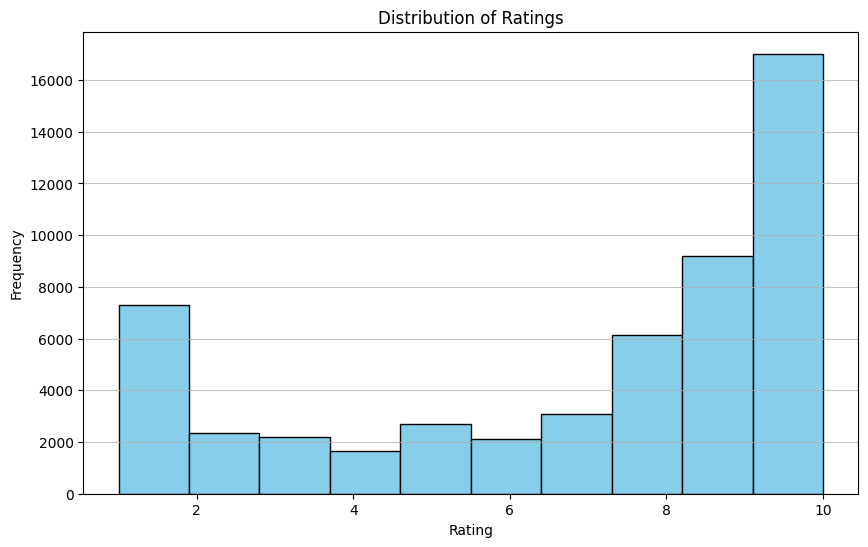

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Plot a histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Calculate the mode of the 'rating' column
most_common_rating = df['rating'].mode().values[0]

print(f"The most common rating given by users is: {most_common_rating}")

The most common rating given by users is: 10


Number of variations for 'Depression': 3125
Number of missing condition entries: 295


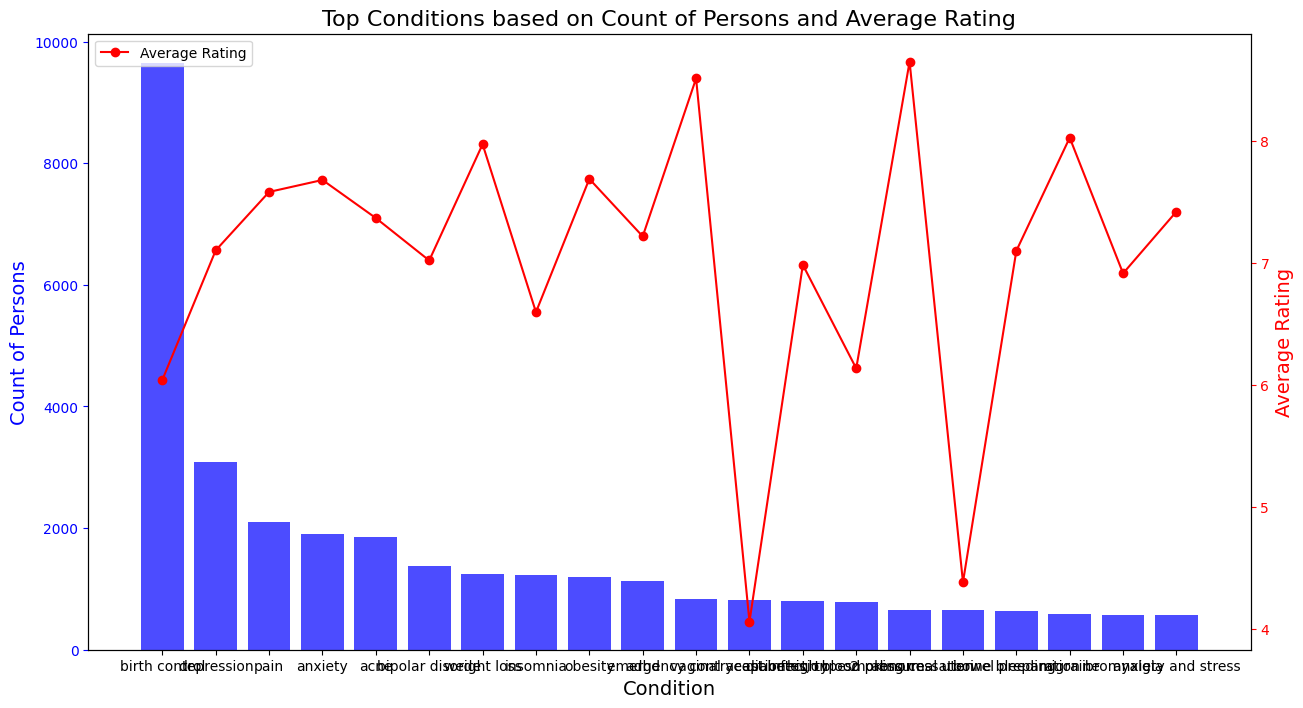

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Check for variations in naming for the condition 'Depression'
depression_variations = df[df['condition'].str.lower().str.contains('depression', na=False)]

# Check for missing values in the 'condition' column
missing_condition_entries = df[df['condition'].isnull()]

# Display the counts for each case
print(f"Number of variations for 'Depression': {len(depression_variations)}")
print(f"Number of missing condition entries: {len(missing_condition_entries)}")

# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by condition and calculate aggregate statistics
condition_stats = df.groupby('condition').agg({
    'uniqueID': 'count',  # Count of reviews
    'rating': 'mean'      # Average rating
})

# Rename columns for clarity
condition_stats.rename(columns={'uniqueID': 'count_person', 'rating': 'average_rating'}, inplace=True)

# Sort conditions by count of persons in descending order
condition_stats = condition_stats.sort_values(by='count_person', ascending=False)

# Display the top conditions
top_conditions = condition_stats.head(20)  # You can adjust the number as needed

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for count of persons
ax1.bar(top_conditions.index, top_conditions['count_person'], color='b', alpha=0.7, label='Count of Persons')
ax1.set_xlabel('Condition', fontsize=14)
ax1.set_ylabel('Count of Persons', color='b', fontsize=14)
ax1.tick_params('y', colors='b')

# Create a second y-axis for average rating
ax2 = ax1.twinx()
ax2.plot(top_conditions.index, top_conditions['average_rating'], color='r', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', color='r', fontsize=14)
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Top Conditions based on Count of Persons and Average Rating', fontsize=16)
plt.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [24]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Sort the DataFrame by 'rating' in descending order
depression_df = depression_df.sort_values(by='rating', ascending=False)

# Display the top medicines with high review ratings
top_medicines_depression = depression_df[['drugName', 'rating']].head(100)  # You can adjust the number as needed

# Display the results
print(f"Top medicines for depression with high review ratings:")
display(top_medicines_depression)


Top medicines for depression with high review ratings:


,drugName,rating
0,Mirtazapine,10
34817,Trintellix,10
11242,Paxil,10
11245,Venlafaxine,10
43529,Lexapro,10
...,...,...
43089,Venlafaxine,10
11894,Sertraline,10
11905,Duloxetine,10
43062,Sertraline,10


In [25]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Count occurrences of each drug name
drug_count_depression = depression_df['drugName'].value_counts()

# Display the count of each drug name for depression
print(f"Count of each drug name for the 'depression' condition:")
print(drug_count_depression)

Count of each drug name for the 'depression' condition:
drugName
Sertraline          204
Bupropion           198
Desvenlafaxine      159
Venlafaxine         137
Pristiq             136
                   ... 
Luvox                 1
Abilify Discmelt      1
Trimipramine          1
Pamelor               1
Maprotiline           1
Name: count, Length: 97, dtype: int64


In [26]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Get the unique drug names for depression
unique_drugs_depression = depression_df['drugName'].unique()

# Get the total number of unique medicines for depression
total_unique_medicines_depression = len(unique_drugs_depression)

# Display the total number of unique medicines for depression
print(f"Total number of unique medicines for the 'depression' condition: {total_unique_medicines_depression}")


Total number of unique medicines for the 'depression' condition: 97


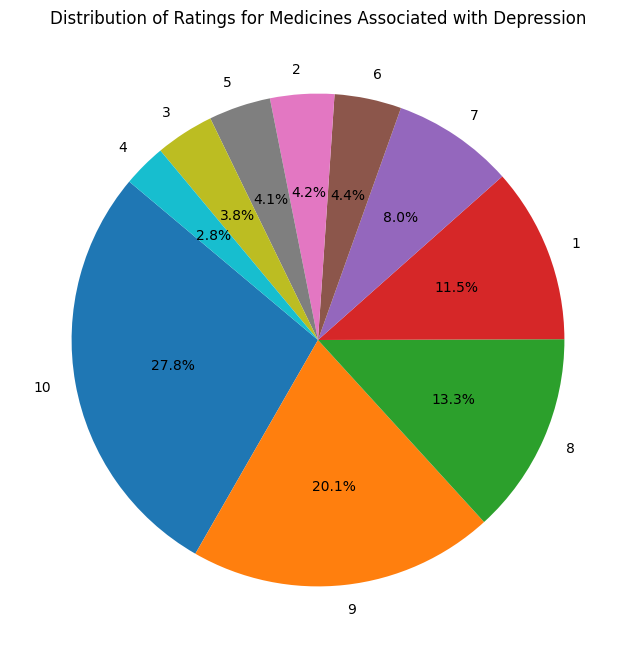

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Count the number of occurrences for each rating
rating_counts = depression_df['rating'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings for Medicines Associated with Depression')
plt.show()

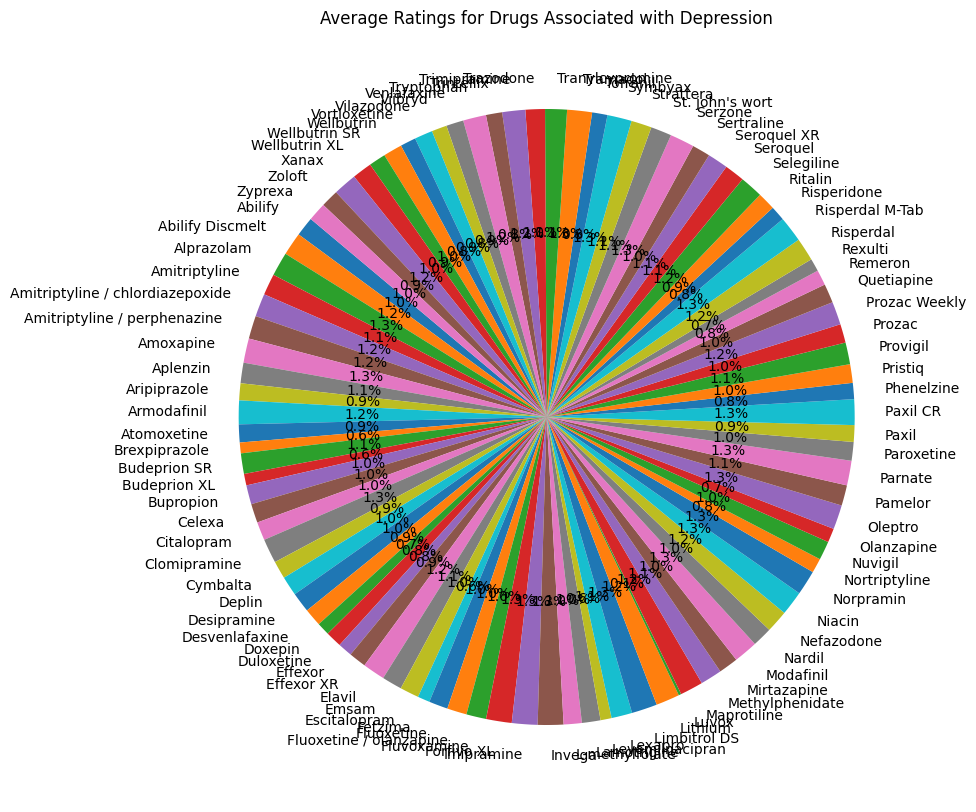

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(drug_ratings, labels=drug_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Ratings for Drugs Associated with Depression')
plt.show()


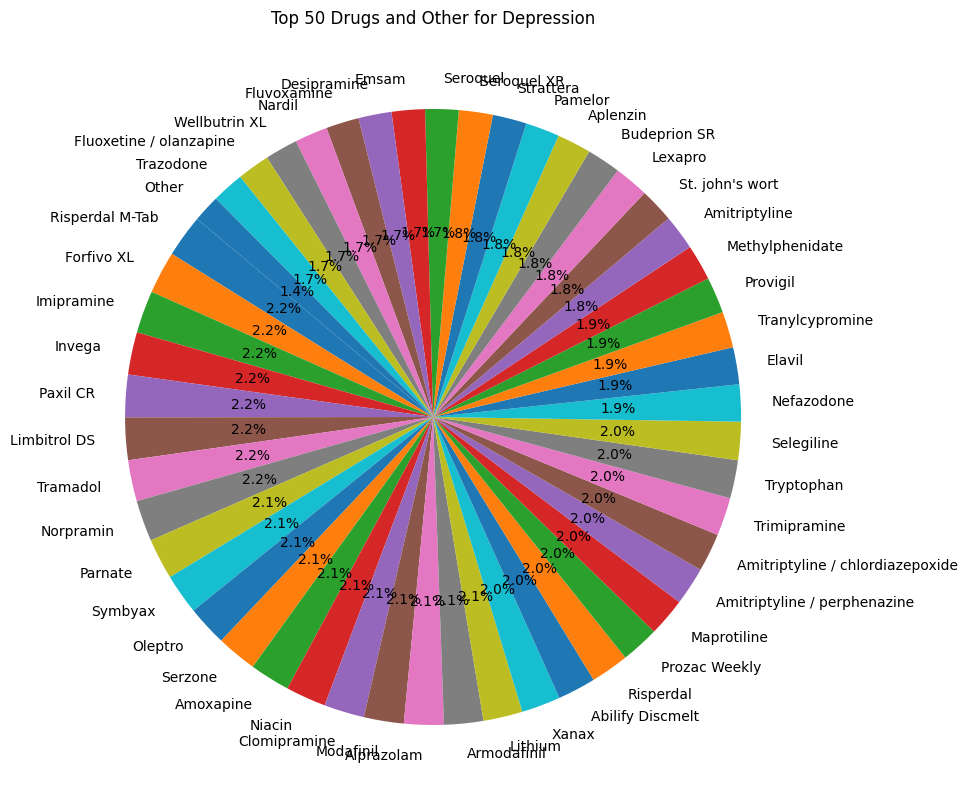

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Sort the drugs by average rating in descending order
sorted_drugs = drug_ratings.sort_values(ascending=False)

# Take the top 50 drugs and combine the rest into 'Other'
top_drugs = sorted_drugs.head(50)
other_drugs = sorted_drugs[50:]

# Combine the ratings for 'Other'
other_rating = other_drugs.mean()

# Create a DataFrame for plotting
plot_data = pd.concat([top_drugs, pd.Series({'Other': other_rating})])

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 50 Drugs and Other for Depression')
plt.show()


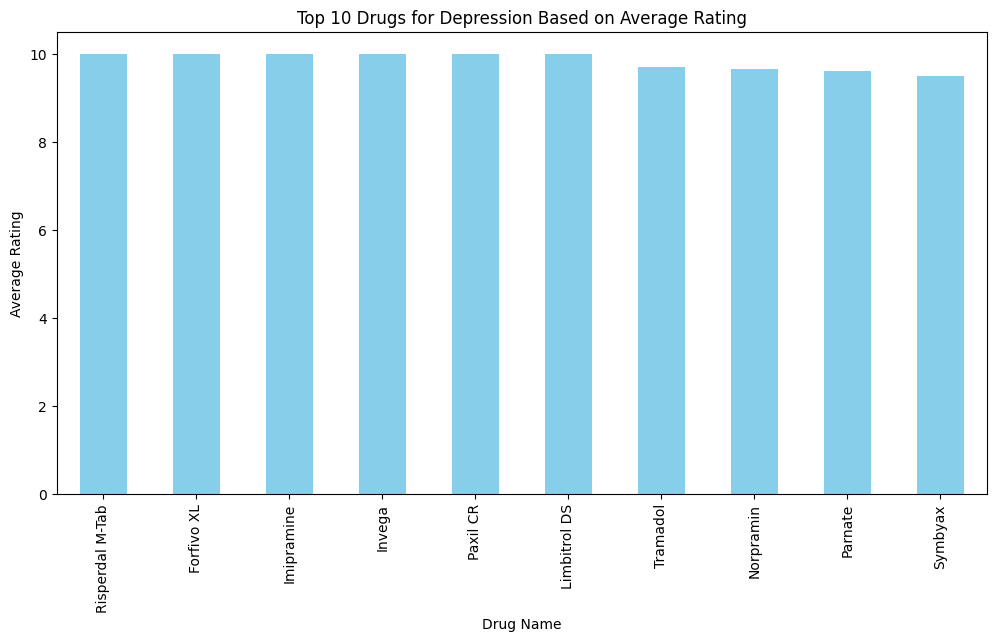

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Sort the drugs by average rating in descending order
sorted_drugs = drug_ratings.sort_values(ascending=False)

# Take the top 10 drugs
top_10_drugs = sorted_drugs.head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_10_drugs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs for Depression Based on Average Rating')
plt.xlabel('Drug Name')
plt.ylabel('Average Rating')
plt.show()


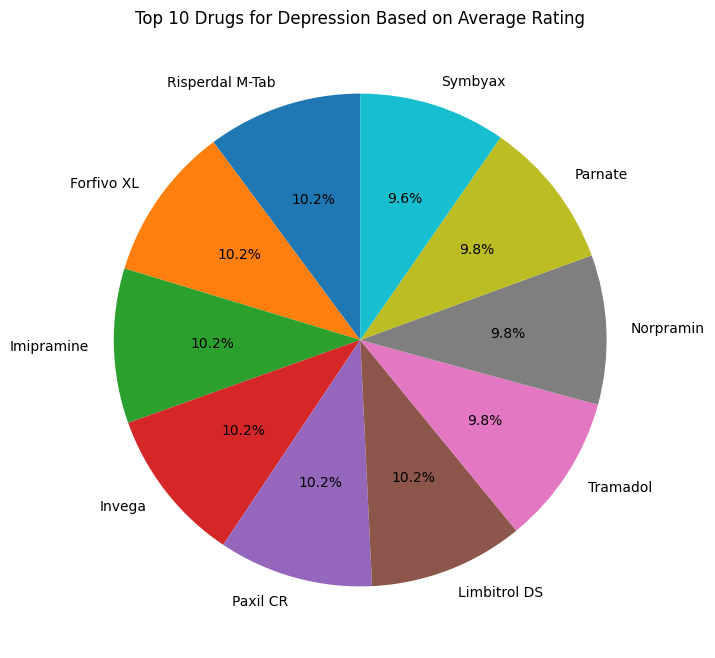

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Sort the drugs by average rating in descending order
sorted_drugs = drug_ratings.sort_values(ascending=False)

# Take the top 10 drugs
top_10_drugs = sorted_drugs.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_drugs, labels=top_10_drugs.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Drugs for Depression Based on Average Rating')
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'depression']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Sort the drugs by average rating in descending order
sorted_drugs = drug_ratings.sort_values(ascending=False)

# Take the top 10 drugs
top_10_drugs = sorted_drugs.head(10)

# Display the top 10 drugs
print(top_10_drugs)

drugName
Risperdal M-Tab    10.000000
Forfivo XL         10.000000
Imipramine         10.000000
Invega             10.000000
Paxil CR           10.000000
Limbitrol DS       10.000000
Tramadol            9.695652
Norpramin           9.666667
Parnate             9.625000
Symbyax             9.500000
Name: rating, dtype: float64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Filter rows for the condition 'depression'
depression_df = df[df['condition'] == 'pain']

# Group by drug name and calculate the average rating
drug_ratings = depression_df.groupby('drugName')['rating'].mean()

# Sort the drugs by average rating in descending order
sorted_drugs = drug_ratings.sort_values(ascending=False)

# Take the top 10 drugs
top_10_drugs = sorted_drugs.head(10)

# Display the top 10 drugs
display(top_10_drugs)

drugName
Vicodin ES              10.0
Motrin Infant Drops     10.0
Bextra                  10.0
Bupivacaine liposome    10.0
Buprenex                10.0
Methadone Diskets       10.0
Trezix                  10.0
Magnesium salicylate    10.0
Reprexain               10.0
Levorphanol             10.0
Name: rating, dtype: float64

In [35]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Display the drugs and their associated conditions
for drug, conditions in multi_condition_drugs.items():
    print(f"Drug: {drug}, Conditions: {', '.join(conditions)}")


Drug: Abilify, Conditions: bipolar disorde, schizoaffective disorde, depression, tourette's syndrome, major depressive disorde, obsessive compulsive disorde, agitated state, schizophrenia, autism, 20</span> users found this comment helpful., post traumatic stress disorde
Drug: Accutane, Conditions: acne, acute nonlymphocytic leukemia
Drug: Acetaminophen, Conditions: sciatica, pain, muscle pain, eve
Drug: Acetaminophen / aspirin / caffeine, Conditions: migraine, osteoarthritis, pain/feve
Drug: Acetaminophen / aspirin / caffeine / salicylamide, Conditions: pain, migraine
Drug: Acetaminophen / codeine, Conditions: osteoarthritis, pain, cough
Drug: Acetaminophen / dexbrompheniramine / pseudoephedrine, Conditions: allergic rhinitis, sinus symptoms
Drug: Acetaminophen / diphenhydramine, Conditions: insomnia, pain
Drug: Acetaminophen / hydrocodone, Conditions: pain, back pain, rheumatoid arthritis, cough, not listed / othe
Drug: Acetaminophen / oxycodone, Conditions: chronic pain, pain, not l

TypeError: sequence item 1: expected str instance, float found

In [37]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Display the drugs and their associated conditions
for drug, conditions in multi_condition_drugs.items():
    conditions_str = ', '.join(str(c) for c in conditions if pd.notna(c))
    display(f"Drug: {drug}, Conditions: {conditions_str}")


"Drug: Abilify, Conditions: bipolar disorde, schizoaffective disorde, depression, tourette's syndrome, major depressive disorde, obsessive compulsive disorde, agitated state, schizophrenia, autism, 20</span> users found this comment helpful., post traumatic stress disorde"

'Drug: Accutane, Conditions: acne, acute nonlymphocytic leukemia'

'Drug: Acetaminophen, Conditions: sciatica, pain, muscle pain, eve'

'Drug: Acetaminophen / aspirin / caffeine, Conditions: migraine, osteoarthritis, pain/feve'

'Drug: Acetaminophen / aspirin / caffeine / salicylamide, Conditions: pain, migraine'

'Drug: Acetaminophen / codeine, Conditions: osteoarthritis, pain, cough'

'Drug: Acetaminophen / dexbrompheniramine / pseudoephedrine, Conditions: allergic rhinitis, sinus symptoms'

'Drug: Acetaminophen / diphenhydramine, Conditions: insomnia, pain'

'Drug: Acetaminophen / hydrocodone, Conditions: pain, back pain, rheumatoid arthritis, cough, not listed / othe'

'Drug: Acetaminophen / oxycodone, Conditions: chronic pain, pain, not listed / othe'

'Drug: Acetaminophen / phenyltoloxamine, Conditions: headache, pain'

'Drug: Acetaminophen / propoxyphene, Conditions: pain, not listed / othe'

'Drug: Acetazolamide, Conditions: glaucoma, hypokalemic periodic paralysis, pseudotumor cerebri, edema, mountain sickness / altitude sickness'

"Drug: Aciphex, Conditions: gerd, stomach ulce, erosive esophagitis, barrett's esophagus"

'Drug: Actemra, Conditions: rheumatoid arthritis, juvenile idiopathic arthritis'

'Drug: Actiq, Conditions: pain, breakthrough pain'

'Drug: Acyclovir, Conditions: cold sores, mononucleosis, herpes zoste, herpes simplex, not listed / othe, herpes simplex, suppression'

"Drug: Adalimumab, Conditions: crohn's disease, maintenance, psoriasis, psoriatic arthritis, rheumatoid arthritis, hidradenitis suppurativa, crohn's disease, ankylosing spondylitis, plaque psoriasis, spondyloarthritis, ulcerative colitis, crohn's disease, acute"

'Drug: Adderall, Conditions: adhd, narcolepsy'

'Drug: Adderall XR, Conditions: narcolepsy, adhd'

'Drug: Adipex-P, Conditions: weight loss, obesity, 5</span> users found this comment helpful., 6</span> users found this comment helpful.'

'Drug: Advair Diskus, Conditions: copd, maintenance, asthma, maintenance, 8</span> users found this comment helpful.'

'Drug: Advair HFA, Conditions: asthma, maintenance, copd, maintenance'

'Drug: Advil, Conditions: pain, sciatica, muscle pain, headache, 4</span> users found this comment helpful., gout, acute'

'Drug: Advil Liqui-Gels, Conditions: pain, rheumatoid arthritis'

'Drug: Aflibercept, Conditions: diabetic macular edema, macular degeneration'

'Drug: Afrezza, Conditions: diabetes, type 1, diabetes, type 2'

'Drug: Albuterol, Conditions: asthma, acute, copd, maintenance, asthma, maintenance, bronchospasm prophylaxis, copd, acute'

'Drug: Alcaftadine, Conditions: conjunctivitis, allergic'

'Drug: Aldactone, Conditions: acne, 12</span> users found this comment helpful., heart failure'

'Drug: Aldara, Conditions: keratosis, basal cell carcinoma, human papilloma virus'

'Drug: Alendronate, Conditions: prevention of osteoporosis, osteoporosis'

'Drug: Alesse, Conditions: birth control, abnormal uterine bleeding, 2</span> users found this comment helpful.'

'Drug: Aleve, Conditions: gout, acute, sciatica, pain, zen shoulde, muscle pain, juvenile rheumatoid arthritis, back pain, tendonitis, period pain, rheumatoid arthritis'

'Drug: Alirocumab, Conditions: high cholesterol, high cholesterol, familial heterozygous'

'Drug: Allegra, Conditions: allergic rhinitis, urticaria'

'Drug: Allopurinol, Conditions: gout, urinary tract stones'

'Drug: Alprazolam, Conditions: anxiety, panic disorde, tinnitus, depression, not listed / othe, dysautonomia, borderline personality disorde'

'Drug: Alrex, Conditions: postoperative ocular inflammation, conjunctivitis'

'Drug: Altabax, Conditions: acne, impetig'

'Drug: Altace, Conditions: high blood pressure, heart attack'

'Drug: Aluminum chloride hexahydrate, Conditions: hyperhidrosis'

'Drug: Alvesco, Conditions: asthma, maintenance, asthma'

"Drug: Amantadine, Conditions: parkinson's disease, multiple sclerosis, chronic fatigue syndrome, head injury"

'Drug: Ambien CR, Conditions: insomnia, 14</span> users found this comment helpful.'

'Drug: Amiodarone, Conditions: arrhythmia, ventricular fibrillation'

'Drug: Amitiza, Conditions: irritable bowel syndrome, constipation, chronic, constipation, drug induced, constipation'

'Drug: Amitriptyline, Conditions: migraine prevention, ibromyalgia, anxiety and stress, pain, hyperhidrosis, cyclic vomiting syndrome, insomnia, irritable bowel syndrome, depression, cough, post traumatic stress disorde, somat, not listed / othe, interstitial cystitis, reflex sympathetic dystrophy syndrome, vulvodynia, m pain disorde, chronic myofascial pain, pudendal neuralgia'

'Drug: Amitriptyline / perphenazine, Conditions: anxiety, depression'

'Drug: Amlodipine, Conditions: high blood pressure, migraine prevention, not listed / othe'

'Drug: Amlodipine / benazepril, Conditions: high blood pressure, not listed / othe'

'Drug: Amlodipine / valsartan, Conditions: ge (amlodipine / valsartan), high blood pressure'

'Drug: Ammonium lactate, Conditions: dry skin, ichthyosis'

'Drug: Amoxicillin, Conditions: bronchitis, dental abscess, upper respiratory tract infection, bacterial infection, urinary tract infection, sinusitis, bacterial endocarditis prevention, tonsillitis/pharyngitis, otitis media'

'Drug: Amoxicillin / clavulanate, Conditions: skin or soft tissue infection, sinusitis, bacterial infection, otitis media, upper respiratory tract infection, bronchitis, strep throat, skin and structure infection, pneumonia, not listed / othe, urinary tract infection'

'Drug: Amoxil, Conditions: skin or soft tissue infection, pneumonia'

'Drug: Amphetamine / dextroamphetamine, Conditions: adhd, atigue, not listed / othe, narcolepsy'

'Drug: Amrix, Conditions: muscle spasm, migraine, sciatica, ibromyalgia'

'Drug: Anaprox, Conditions: tendonitis, back pain'

'Drug: Anastrozole, Conditions: breast cance, endometrial cance'

'Drug: Anoro Ellipta, Conditions: copd, 22</span> users found this comment helpful.'

'Drug: Apixaban, Conditions: not listed / othe, pulmonary embolism, prevention of thromboembolism in atrial fibrillation, thromboembolic stroke prophylaxis'

'Drug: Apremilast, Conditions: psoriatic arthritis, plaque psoriasis'

'Drug: Apri, Conditions: birth control, polycystic ovary syndrome'

"Drug: Apriso, Conditions: crohn's disease, ulcerative colitis, ulcerative colitis, maintenance, inflammatory bowel disease"

'Drug: Aranesp, Conditions: anemia, chemotherapy induced, anemia associated with chronic renal failure'

'Drug: Arimidex, Conditions: breast cance, breast cancer, metastatic'

"Drug: Aripiprazole, Conditions: bipolar disorde, not listed / othe, depression, schizophrenia, major depressive disorde, agitated state, schizoaffective disorde, autism, obsessive compulsive disorde, post traumatic stress disorde, borderline personality disorde, tourette's syndrome"

'Drug: Armodafinil, Conditions: narcolepsy, bipolar disorde, shift work sleep disorde, obstructive sleep apnea/hypopnea syndrome, depression, hypersomnia, ibromyalgia, chronic fatigue syndrome, adhd'

"Drug: Armour Thyroid, Conditions: underactive thyroid, hashimoto's disease, tsh suppression, hypothyroidism, after thyroid removal, thyroid cance"

'Drug: Arthrotec, Conditions: osteoarthritis, sciatica, rheumatoid arthritis'

"Drug: Asacol, Conditions: ulcerative colitis, ulcerative colitis, maintenance, lymphocytic colitis, ulcerative colitis, active, crohn's disease, maintenance, crohn's disease"

"Drug: Asacol HD, Conditions: ulcerative colitis, maintenance, ulcerative colitis, active, ulcerative colitis, crohn's disease, maintenance"

'Drug: Asenapine, Conditions: bipolar disorde, schizoaffective disorde, post traumatic stress disorde, borderline personality disorde, schizophrenia'

'Drug: Aspirin, Conditions: osteoarthritis, heart attack, back pain'

'Drug: Aspirin / butalbital / caffeine, Conditions: headache, migraine'

'Drug: Aspirin / butalbital / caffeine / codeine, Conditions: headache'

'Drug: Aspirin / caffeine / orphenadrine, Conditions: muscle spasm, muscle pain'

'Drug: Aspirin / carisoprodol, Conditions: muscle pain, muscle spasm'

'Drug: Atarax, Conditions: anxiety, sedation, pruritus, allergies, nausea/vomiting, pain'

'Drug: Atenolol, Conditions: anxiety, high blood pressure, mitral valve prolapse, migraine prevention, supraventricular tachycardia'

'Drug: Ativan, Conditions: anxiety, insomnia, sedation, panic disorde, light anesthesia, nausea/vomiting, cervical dystonia'

'Drug: Atomoxetine, Conditions: adhd, depression, social anxiety disorde'

'Drug: Atorvastatin, Conditions: high cholesterol, prevention of cardiovascular disease, high cholesterol, familial homozygous'

'Drug: Atovaquone / proguanil, Conditions: malaria prevention, malaria'

'Drug: Atropine / hyoscyamine / phenobarbital / scopolamine, Conditions: irritable bowel syndrome, enterocolitis, duodenal ulce'

'Drug: Augmentin, Conditions: skin or soft tissue infection, otitis media, upper respiratory tract infection, sinusitis, 2</span> users found this comment helpful., bronchitis, urinary tract infection, bacterial infection, strep throat, 5</span> users found this comment helpful., skin and structure infection'

'Drug: Avapro, Conditions: high blood pressure, diabetic kidney disease'

'Drug: Avastin, Conditions: glioblastoma multiforme, ovarian cance'

'Drug: Avelox, Conditions: sinusitis, pneumonia, bronchitis, bacterial infection'

'Drug: Aviane, Conditions: birth control, abnormal uterine bleeding, 15</span> users found this comment helpful., 0</span> users found this comment helpful., 4</span> users found this comment helpful., 6</span> users found this comment helpful., endometriosis'

'Drug: Avinza, Conditions: pain, chronic pain'

"Drug: Azathioprine, Conditions: autoimmune hepatitis, crohn's disease, acute, ulcerative colitis, crohn's disease, crohn's disease, maintenance, systemic lupus erythematosus, atopic dermatitis, rheumatoid arthritis, multiple sclerosis"

'Drug: Azelaic acid, Conditions: rosacea, acne'

'Drug: Azelastine, Conditions: allergic rhinitis, conjunctivitis, allergic, not listed / othe'

'Drug: Azelastine / fluticasone, Conditions: allergic rhinitis'

'Drug: Azelex, Conditions: rosacea, acne'

'Drug: Azithromycin, Conditions: bronchitis, sinusitis, chlamydia infection, tonsillitis/pharyngitis, otitis media, gonococcal infection, uncomplicated, upper respiratory tract infection, pneumonia, bacterial infection, not listed / othe, mycoplasma pneumonia, copd, acute, skin or soft tissue infection, lyme disease, erythema chronicum migrans'

'Drug: Azithromycin Dose Pack, Conditions: upper respiratory tract infection, sinusitis, bronchitis, chlamydia infection, bacterial infection, skin or soft tissue infection'

'Drug: Bacitracin / neomycin / polymyxin b, Conditions: bacterial skin infection'

'Drug: Baclofen, Conditions: muscle spasm, alcohol withdrawal, migraine prevention, cerebral spasticity, trigeminal neuralgia, chronic spasticity, dystonia, hiccups, neuralgia, cervical dystonia'

'Drug: Bactrim, Conditions: urinary tract infection, kidney infections, acne, bacterial skin infection, 3</span> users found this comment helpful., bronchitis, sinusitis, prevention of bladder infection, bacterial infection, prostatitis'

'Drug: Bactrim DS, Conditions: prevention of bladder infection, urinary tract infection, acne, bacterial skin infection, infection prophylaxis, bacterial infection, prostatitis'

'Drug: Bactroban, Conditions: nasal carriage of staphylococcus aureus, skin and structure infection'

"Drug: Balsalazide, Conditions: ulcerative colitis, active, crohn's disease, ulcerative colitis"

'Drug: Bazedoxifene / conjugated estrogens, Conditions: postmenopausal symptoms, hot flashes'

'Drug: Beclomethasone, Conditions: asthma, maintenance, allergic rhinitis'

'Drug: Belbuca, Conditions: chronic pain, pain'

'Drug: Belviq, Conditions: weight loss, obesity, 41</span> users found this comment helpful.'

'Drug: Benadryl, Conditions: allergic reactions, nausea/vomiting, insomnia'

'Drug: Benadryl Allergy, Conditions: urticaria, allergic reactions'

'Drug: Benzocaine, Conditions: burns, external, cold sores, oral and dental conditions, pruritus, aphthous ulce'

'Drug: Betamethasone, Conditions: inflammatory conditions, atopic dermatitis, not listed / othe, plaque psoriasis'

'Drug: Betamethasone / calcipotriene, Conditions: psoriasis, plaque psoriasis'

'Drug: Bevacizumab, Conditions: me, glioblastoma multi, breast cancer, metastatic'

'Drug: Bextra, Conditions: pain, osteoarthritis'

'Drug: Beyaz, Conditions: acne, birth control, premenstrual dysphoric disorde, 2</span> users found this comment helpful., 6</span> users found this comment helpful.'

'Drug: Biaxin, Conditions: sinusitis, bronchitis, strep throat, pneumonia, dental abscess, helicobacter pylori infection'

'Drug: Biaxin XL, Conditions: pneumonia, bronchitis'

'Drug: Bisacodyl, Conditions: constipation, bowel preparation'

'Drug: Bismuth subsalicylate, Conditions: indigestion, diarrhea'

'Drug: Bisoprolol, Conditions: heart failure, supraventricular tachycardia, high blood pressure'

'Drug: Bonine, Conditions: motion sickness, vertig'

'Drug: Botox, Conditions: strabismus, overactive bladde, cervical dystonia, migraine prevention, migraine, dystonia, hyperhidrosis, urinary incontinence'

'Drug: Breo Ellipta, Conditions: asthma, asthma, maintenance, copd, copd, maintenance'

'Drug: Brexpiprazole, Conditions: schizophrenia, not listed / othe, depression, major depressive disorde'

'Drug: Brimonidine, Conditions: rosacea, intraocular hypertension, glaucoma, open angle, not listed / othe'

"Drug: Bromocriptine, Conditions: hyperprolactinemia, parkinson's disease"

'Drug: Brompheniramine, Conditions: cold symptoms, allergic rhinitis'

'Drug: BuSpar, Conditions: anxiety, panic disorde, 31</span> users found this comment helpful.'

'Drug: Budeprion SR, Conditions: depression, major depressive disorde'

'Drug: Budeprion XL, Conditions: depression, adhd'

"Drug: Budesonide, Conditions: allergic rhinitis, ulcerative colitis, asthma, maintenance, ulcerative colitis, active, inflammatory bowel disease, crohn's disease, maintenance"

'Drug: Bupivacaine, Conditions: postoperative pain, local anesthesia'

'Drug: Buprenorphine, Conditions: opiate dependence, chronic pain, pain, not listed / othe'

'Drug: Buprenorphine / naloxone, Conditions: opiate dependence, not listed / othe'

'Drug: Bupropion, Conditions: depression, smoking cessation, adhd, major depressive disorde, bipolar disorde, anxiety, panic disorde, not listed / othe, migraine prevention, sexual dysfunction, ssri induced, seasonal affective disorde, persistent depressive disorde, obesity, premenstrual dysphoric disorde'

'Drug: Bupropion / naltrexone, Conditions: weight loss, obesity'

'Drug: Buspirone, Conditions: panic disorde, anxiety, sexual dysfunction, ssri induced, not listed / othe'

'Drug: Butorphanol, Conditions: labor pain, pain, anesthesia'

'Drug: Butrans, Conditions: chronic pain, pain, 17</span> users found this comment helpful.'

'Drug: Bystolic, Conditions: high blood pressure, mitral valve prolapse'

'Drug: Cafergot, Conditions: migraine, cluster headaches'

'Drug: Caffeine, Conditions: hypersomnia'

'Drug: Caffeine / ergotamine, Conditions: migraine, cluster headaches'

'Drug: Calcitriol, Conditions: psoriasis, hypocalcemia'

'Drug: Calcium carbonate, Conditions: indigestion, gerd'

'Drug: Camrese, Conditions: birth control, 2</span> users found this comment helpful.'

"Drug: Canasa, Conditions: crohn's disease, ulcerative proctitis"

'Drug: Candesartan, Conditions: migraine prevention, high blood pressure'

'Drug: Capsaicin, Conditions: postherpetic neuralgia, pain, osteoarthritis, diabetic peripheral neuropathy'

'Drug: Carac, Conditions: actinic keratosis, basal cell carcinoma, keratosis'

'Drug: Carafate, Conditions: stomach ulce, gerd'

'Drug: Carbamazepine, Conditions: schizoaffective disorde, trigeminal neuralgia, borderline personality disorde, bipolar disorde, epilepsy'

'Drug: Carbatrol, Conditions: epilepsy, trigeminal neuralgia'

"Drug: Carbidopa / levodopa, Conditions: restless legs syndrome, parkinson's disease"

'Drug: Cardizem, Conditions: high blood pressure, atrial fibrillation'

'Drug: Cardizem CD, Conditions: supraventricular tachycardia, atrial flutte'

'Drug: Cardura, Conditions: benign prostatic hyperplasia, high blood pressure'

'Drug: Cariprazine, Conditions: bipolar disorde, schizophrenia'

'Drug: Carisoprodol, Conditions: nocturnal leg cramps, muscle spasm'

'Drug: Cartia XT, Conditions: high blood pressure, atrial fibrillation'

'Drug: Carvedilol, Conditions: high blood pressure, heart failure, left ventricular dysfunction, atrial fibrillation'

'Drug: Cataflam, Conditions: period pain, pain, back pain, sciatica'

'Drug: Catapres, Conditions: opiate withdrawal, anxiety, migraine prevention'

'Drug: Cefdinir, Conditions: sinusitis, otitis media, bronchitis, strep throat, tonsillitis/pharyngitis'

'Drug: Cefixime, Conditions: bladder infection, urinary tract infection'

'Drug: Cefpodoxime, Conditions: upper respiratory tract infection, bronchitis'

'Drug: Cefprozil, Conditions: sinusitis, pneumonia'

'Drug: Ceftin, Conditions: urinary tract infection, upper respiratory tract infection, bacterial infection, pneumonia, sinusitis'

'Drug: Ceftriaxone, Conditions: lyme disease, neurologic, pneumonia, urinary tract infection, bacterial infection, kidney infections, gonococcal infection, uncomplicated, joint infection'

'Drug: Cefuroxime, Conditions: sinusitis, urinary tract infection, pneumonia, bronchitis, upper respiratory tract infection, bacterial infection, surgical prophylaxis, lyme disease'

'Drug: Cefzil, Conditions: bladder infection, sinusitis, tonsillitis/pharyngitis'

'Drug: Celebrex, Conditions: osteoarthritis, juvenile rheumatoid arthritis, pain, rheumatoid arthritis'

'Drug: Celecoxib, Conditions: osteoarthritis, pain, rheumatoid arthritis'

'Drug: Celexa, Conditions: anxiety and stress, depression, panic disorde, 12</span> users found this comment helpful., premenstrual dysphoric disorde, 7</span> users found this comment helpful., generalized anxiety disorde'

'Drug: CellCept, Conditions: systemic lupus erythematosus, ulcerative colitis, 12</span> users found this comment helpful., organ transplant, rejection prophylaxis, myasthenia gravis, autoimmune hepatitis'

'Drug: Cephalexin, Conditions: bacterial infection, bladder infection, upper respiratory tract infection, kidney infections, skin or soft tissue infection, acne, otitis media'

"Drug: Certolizumab, Conditions: ankylosing spondylitis, crohn's disease, crohn's disease, maintenance"

'Drug: Cetirizine, Conditions: urticaria, allergic rhinitis'

'Drug: Cetirizine / pseudoephedrine, Conditions: allergic rhinitis'

'Drug: Chantix, Conditions: smoking cessation, 0</span> users found this comment helpful.'

'Drug: Chateal, Conditions: birth control, abnormal uterine bleeding'

'Drug: Chlor-Trimeton, Conditions: allergic rhinitis, allergic reactions'

'Drug: Chlordiazepoxide, Conditions: anxiety, alcohol withdrawal, opiate withdrawal'

'Drug: Chlordiazepoxide / clidinium, Conditions: irritable bowel syndrome, peptic ulce'

'Drug: Chlorhexidine, Conditions: mucositis, gingivitis, skin disinfection, preoperative, periodontitis'

'Drug: Chlorpheniramine, Conditions: allergic reactions, allergic rhinitis'

'Drug: Chlorpheniramine / hydrocodone, Conditions: cough, cold symptoms'

'Drug: Chlorpheniramine / phenylephrine, Conditions: allergic rhinitis, cold symptoms'

'Drug: Chlorpromazine, Conditions: psychosis, mania, light sedation, hiccups'

'Drug: Chlorthalidone, Conditions: edema, high blood pressure'

"Drug: Cholestyramine, Conditions: irritable bowel syndrome, dumping syndrome, post-cholecystectomy diarrhea, crohn's disease"

'Drug: Chondroitin / glucosamine, Conditions: osteoarthritis, dietary supplementation'

'Drug: Chorionic gonadotropin (hcg), Conditions: ovulation induction, obesity, hypogonadism, male'

'Drug: Chromium picolinate, Conditions: diabetes, type 2, vitamin/mineral supplementation and deficiency'

'Drug: Cialis, Conditions: erectile dysfunction, 9</span> users found this comment helpful., benign prostatic hyperplasia, 51</span> users found this comment helpful., 13</span> users found this comment helpful.'

'Drug: Ciclesonide, Conditions: allergic rhinitis, asthma, maintenance, asthma'

'Drug: Ciclopirox, Conditions: onychomycosis, fingernail, onychomycosis, toenail, seborrheic dermatitis'

"Drug: Cimzia, Conditions: crohn's disease, crohn's disease, maintenance, rheumatoid arthritis, psoriatic arthritis, crohn's disease, acute"

'Drug: Cipro, Conditions: urinary tract infection, bladder infection, sinusitis, kidney infections, prostatitis, bacterial infection, diverticulitis, infection prophylaxis, 6</span> users found this comment helpful., bronchitis'

'Drug: Ciprodex, Conditions: otitis media, otitis externa, 9</span> users found this comment helpful.'

'Drug: Ciprofloxacin, Conditions: urinary tract infection, kidney infections, prostatitis, bladder infection, bronchitis, sinusitis, salmonella gastroenteritis, tympanostomy tube placement surgery, bacterial infection, pneumonia, skin or soft tissue infection, acute otitis externa, infection prophylaxis, diverticulitis, not listed / othe, epididymitis, sexually transmitted'

'Drug: Ciprofloxacin / dexamethasone, Conditions: otitis externa, otitis media'

'Drug: Citalopram, Conditions: anxiety and stress, depression, postpartum depression, generalized anxiety disorde, premenstrual dysphoric disorde, obsessive compulsive disorde, hot flashes, panic disorde, not listed / othe, agitation, bipolar disorde, persistent depressive disorde'

'Drug: Clarinex, Conditions: urticaria, allergic rhinitis'

'Drug: Clarithromycin, Conditions: pneumonia, sinusitis, otitis media, bronchitis, upper respiratory tract infection, pertussis, strep throat, helicobacter pylori infection, tonsillitis/pharyngitis, not listed / othe, skin or soft tissue infection, mycoplasma pneumonia, pertussis prophylaxis'

'Drug: Claritin-D, Conditions: allergic rhinitis, nasal congestion'

'Drug: ClearLax, Conditions: constipation, constipation, acute'

'Drug: Cleocin, Conditions: bacterial infection, skin or soft tissue infection'

'Drug: Climara, Conditions: postmenopausal symptoms, hypoestrogenism'

'Drug: Clindamycin, Conditions: acne, skin or soft tissue infection, bacterial infection, sinusitis, bacterial vaginitis, surgical prophylaxis, bone infection, bacterial endocarditis prevention, pneumonia, deep neck infection, peritonitis, not listed / othe'

'Drug: Clobetasol, Conditions: psoriasis, dermatitis, anal itching, atopic dermatitis, lichen sclerosus, lichen planus'

'Drug: Clocortolone, Conditions: dermatitis, atopic dermatitis'

'Drug: Cloderm, Conditions: dermatitis, eczema'

'Drug: Clomid, Conditions: emale infertility, ovulation induction, oligospermia'

'Drug: Clomiphene, Conditions: emale infertility, ovulation induction, oligospermia'

'Drug: Clomipramine, Conditions: premature ejaculation, obsessive compulsive disorde, panic disorde, not listed / othe, depression'

'Drug: Clonazepam, Conditions: panic disorde, anxiety, restless legs syndrome, bipolar disorde, seizure prevention, insomnia, burning mouth syndrome, periodic limb movement disorde, migraine prevention, night terrors, borderline personality disorde, benzodiazepine withdrawal, not listed / othe, temporomandibular joint disorde, chronic myofascial pain'

"Drug: Clonidine, Conditions: adhd, perimenopausal symptoms, opiate withdrawal, high blood pressure, tourette's syndrome, hypertensive emergency, anxiety, insomnia, stimulant-associated, hyperhidrosis, restless legs syndrome"

'Drug: Clopidogrel, Conditions: platelet aggregation inhibition, heart attack, transient ischemic attack, percutaneous coronary intervention, peripheral arterial disease'

'Drug: Clotrimazole, Conditions: oral thrush, cutaneous candidiasis, tinea corporis'

'Drug: Clozapine, Conditions: schizophrenia, paranoid disorde, not listed / othe'

'Drug: Codeine, Conditions: pain, cough'

'Drug: Codeine / guaifenesin, Conditions: cough'

"Drug: Colchicine, Conditions: gout, acute, behcet's disease"

'Drug: Colesevelam, Conditions: diarrhea, chronic, hyperlipoproteinemia type iia, elevated ldl, diabetes, type 2'

'Drug: Compazine, Conditions: nausea/vomiting, anxiety'

'Drug: Concerta, Conditions: adhd, narcolepsy, 39</span> users found this comment helpful., 2</span> users found this comment helpful.'

'Drug: Conjugated estrogens, Conditions: atrophic vaginitis, abnormal uterine bleeding, postmenopausal symptoms, hypoestrogenism'

'Drug: Conjugated estrogens / medroxyprogesterone, Conditions: postmenopausal symptoms'

'Drug: Contrave, Conditions: weight loss, obesity'

'Drug: Coreg, Conditions: left ventricular dysfunction, high blood pressure, heart failure'

'Drug: Coricidin HBP Cough & Cold, Conditions: 3</span> users found this comment helpful., cough and nasal congestion'

'Drug: Corticotropin, Conditions: multiple sclerosis, cal segmental glomerulosclerosis, polymyositis/dermatomyositis, sarcoidosis'

'Drug: Cosentyx, Conditions: plaque psoriasis, ankylosing spondylitis, psoriatic arthritis'

'Drug: Coumadin, Conditions: prevention of thromboembolism in atrial fibrillation, deep vein thrombosis prophylaxis after hip replacement surgery, deep vein thrombosis, recurrent event'

'Drug: Creon, Conditions: cystic fibrosis, pancreatic exocrine dysfunction, chronic pancreatitis'

'Drug: Crestor, Conditions: high cholesterol, high cholesterol, familial heterozygous, prevention of cardiovascular disease'

'Drug: Cryselle, Conditions: endometriosis, birth control, abnormal uterine bleeding'

'Drug: Cyanocobalamin, Conditions: b12 nutritional deficiency, vitamin b12 deficiency'

'Drug: Cyclizine, Conditions: nausea/vomiting, motion sickness'

'Drug: Cyclobenzaprine, Conditions: muscle spasm, ibromyalgia, temporomandibular joint disorde, migraine, not listed / othe, sciatica'

'Drug: Cyclosporine, Conditions: keratoconjunctivitis sicca, ulcerative colitis, active, psoriasis, idiopathic thrombocytopenic purpura'

'Drug: Cymbalta, Conditions: osteoarthritis, depression, major depressive disorde, ibromyalgia, anxiety, diabetic peripheral neuropathy, chronic pain, generalized anxiety disorde, back pain, pain, peripheral neuropathy, hot flashes, bipolar disorde, chronic fatigue syndrome, 7</span> users found this comment helpful., urinary incontinence'

'Drug: Cyproheptadine, Conditions: allergic reactions, anorexia, migraine, cluster headaches, urticaria, allergic rhinitis'

'Drug: Cytomel, Conditions: hypothyroidism, after thyroid removal, underactive thyroid'

'Drug: DDAVP, Conditions: diabetes insipidus, primary nocturnal enuresis'

'Drug: Dabigatran, Conditions: prevention of thromboembolism in atrial fibrillation, deep vein thrombosis'

'Drug: Daliresp, Conditions: copd, copd, maintenance'

'Drug: Dapsone, Conditions: acne, pemphigoid'

'Drug: Darifenacin, Conditions: urinary incontinence, overactive bladde'

'Drug: Daytrana, Conditions: adhd, 1</span> users found this comment helpful.'

'Drug: Deltasone, Conditions: cluster headaches, asthma'

'Drug: Demerol, Conditions: pain, light sedation'

'Drug: Denosumab, Conditions: osteoporosis, hypercalcemia of malignancy'

'Drug: Depakote, Conditions: bipolar disorde, epilepsy, migraine prevention, mania, hyperekplexia, 5</span> users found this comment helpful.'

'Drug: Depakote ER, Conditions: migraine prevention, bipolar disorde, epilepsy'

'Drug: Deplin, Conditions: depression, lic acid deficiency'

'Drug: Depo-Medrol, Conditions: 4</span> users found this comment helpful., inflammatory conditions'

'Drug: Depo-Provera, Conditions: birth control, endometriosis, abnormal uterine bleeding, 4</span> users found this comment helpful., 2</span> users found this comment helpful., amenorrhea, 1</span> users found this comment helpful., 5</span> users found this comment helpful., 6</span> users found this comment helpful., 0</span> users found this comment helpful., 12</span> users found this comment helpful.'

'Drug: Dermal filler, Conditions: acial wrinkles, not listed / othe, acial lipoatrophy'

'Drug: Desipramine, Conditions: depression, vulvodynia, irritable bowel syndrome'

"Drug: Desmopressin, Conditions: von willebrand's disease, primary nocturnal enuresis, diabetes insipidus"

'Drug: Desogestrel / ethinyl estradiol, Conditions: birth control, polycystic ovary syndrome, abnormal uterine bleeding'

'Drug: Desonide, Conditions: dermatitis, atopic dermatitis, psoriasis, eczema'

'Drug: Desoximetasone, Conditions: eczema, atopic dermatitis'

'Drug: Desoxyn, Conditions: obesity, adhd'

'Drug: Desvenlafaxine, Conditions: depression, major depressive disorde, ibromyalgia, anxiety, panic disorde, narcolepsy, postmenopausal symptoms, bipolar disorde, adhd, post traumatic stress disorde, hot flashes'

'Drug: Desyrel, Conditions: insomnia, ibromyalgia, sedation'

"Drug: Dexamethasone, Conditions: inflammatory conditions, idiopathic thrombocytopenic purpura, aphthous ulce, gouty arthritis, conjunctivitis, atopic dermatitis, ulcerative colitis, eczema, cerebral edema, plaque psoriasis, addison's disease, nausea/vomiting, chemotherapy induced, uveitis"

'Drug: Dexbrompheniramine / pseudoephedrine, Conditions: cold symptoms, nasal congestion, allergic rhinitis, sinus symptoms'

'Drug: Dexedrine, Conditions: adhd, narcolepsy, sexual dysfunction, ssri induced'

"Drug: Dexilant, Conditions: gerd, erosive esophagitis, barrett's esophagus, 22</span> users found this comment helpful."

"Drug: Dexlansoprazole, Conditions: gerd, barrett's esophagus, erosive esophagitis"

'Drug: Dexmethylphenidate, Conditions: adhd, auditory processing disorde'

'Drug: Dextroamphetamine, Conditions: adhd, hypersomnia, atigue, narcolepsy'

'Drug: Dextrostat, Conditions: narcolepsy, adhd'

'Drug: Diamox, Conditions: pseudotumor cerebri, mountain sickness / altitude sickness, glaucoma'

"Drug: Diazepam, Conditions: not listed / othe, meniere's disease, anxiety, muscle spasm, light sedation, temporomandibular joint disorde, seizures, light anesthesia, alcohol withdrawal, seizure prevention"

'Drug: Diazepam Intensol, Conditions: anxiety, muscle spasm'

'Drug: Diclofenac, Conditions: pain, migraine, back pain, ankylosing spondylitis, period pain, osteoarthritis, spondyloarthritis, sciatica, rheumatoid arthritis, zen shoulde, muscle pain, postoperative ocular inflammation, not listed / othe'

'Drug: Diclofenac / misoprostol, Conditions: osteoarthritis, rheumatoid arthritis, sciatica'

'Drug: Dicyclomine, Conditions: irritable bowel syndrome, noninfectious colitis'

'Drug: Dienogest / estradiol, Conditions: birth control, menorrhagia'

'Drug: Diethylpropion, Conditions: obesity'

'Drug: Differin, Conditions: acne, 4</span> users found this comment helpful.'

'Drug: Difluprednate, Conditions: uveitis, postoperative ocular inflammation'

'Drug: Digoxin, Conditions: heart failure, atrial fibrillation'

'Drug: Dihydroergotamine, Conditions: migraine, cluster headaches'

'Drug: Dilantin, Conditions: epilepsy, seizures, anxiety'

'Drug: Dilaudid, Conditions: pain, chronic pain'

'Drug: Diltiazem, Conditions: supraventricular tachycardia, high blood pressure, atrial flutte, atrial fibrillation'

'Drug: Dimenhydrinate, Conditions: motion sickness, nausea/vomiting'

'Drug: Diovan, Conditions: high blood pressure, left ventricular dysfunction'

'Drug: Diphenhydramine, Conditions: insomnia, urticaria, allergic reactions, nausea/vomiting, extrapyramidal reaction, allergic rhinitis'

'Drug: Diphenhydramine / naproxen, Conditions: insomnia, pain'

'Drug: Divalproex sodium, Conditions: bipolar disorde, epilepsy, mania, migraine prevention, not listed / othe'

'Drug: Dolophine, Conditions: pain, chronic pain'

"Drug: Donepezil, Conditions: alzheimer's disease, mild cognitive impairment"

'Drug: Donnatal, Conditions: duodenal ulce, irritable bowel syndrome'

'Drug: Doryx, Conditions: upper respiratory tract infection, acne, rosacea, urinary tract infection'

'Drug: Doxepin, Conditions: depression, insomnia, urticaria, anxiety, irritable bowel syndrome'

'Drug: Doxy 100, Conditions: lyme disease, bacterial infection'

'Drug: Doxycycline, Conditions: acne, chlamydia infection, bacterial infection, bronchitis, rosacea, upper respiratory tract infection, pneumonia, malaria, lyme disease, skin or soft tissue infection, pelvic inflammatory disease, anthrax, ehrlichiosis, malaria prevention, urinary tract infection, prostatitis, lyme disease, neurologic'

'Drug: Dramamine, Conditions: motion sickness, nausea/vomiting'

'Drug: Drixoral Cold and Allergy, Conditions: sinus symptoms, nasal congestion, allergic rhinitis'

'Drug: Dronabinol, Conditions: anorexia, nausea/vomiting, chemotherapy induced, post traumatic stress disorde, aids related wasting'

'Drug: Drospirenone / ethinyl estradiol, Conditions: birth control, premenstrual dysphoric disorde, menstrual disorders, polycystic ovary syndrome, acne'

'Drug: Drospirenone / ethinyl estradiol / levomefolate calcium, Conditions: birth control, premenstrual dysphoric disorde, polycystic ovary syndrome, acne'

'Drug: Drysol, Conditions: hyperhidrosis, 0</span> users found this comment helpful.'

'Drug: Duexis, Conditions: osteoarthritis, rheumatoid arthritis'

'Drug: Dulcolax, Conditions: constipation, bowel preparation'

'Drug: Dulera, Conditions: asthma, maintenance, asthma, 28</span> users found this comment helpful.'

'Drug: Duloxetine, Conditions: pain, depression, ibromyalgia, osteoarthritis, bipolar disorde, chronic pain, back pain, major depressive disorde, generalized anxiety disorde, anxiety, urinary incontinence, peripheral neuropathy, diabetic peripheral neuropathy, hot flashes, not listed / othe, chronic fatigue syndrome'

'Drug: Dupilumab, Conditions: eczema, atopic dermatitis'

'Drug: Dupixent, Conditions: atopic dermatitis, eczema'

'Drug: Duragesic, Conditions: chronic pain, pain'

'Drug: Econazole, Conditions: tinea versicol, tinea pedis, tinea corporis'

'Drug: Effexor, Conditions: bipolar disorde, depression, anxiety and stress, major depressive disorde, postpartum depression, ibromyalgia, 8</span> users found this comment helpful., 2</span> users found this comment helpful., obsessive compulsive disorde'

'Drug: Effexor XR, Conditions: anxiety, depression, generalized anxiety disorde, major depressive disorde, panic disorde, postpartum depression, anxiety and stress, ibromyalgia, 10</span> users found this comment helpful., obsessive compulsive disorde, social anxiety disorde, bipolar disorde, 17</span> users found this comment helpful.'

'Drug: Efudex, Conditions: 6</span> users found this comment helpful., basal cell carcinoma, keratosis, actinic keratosis'

'Drug: Elavil, Conditions: anxiety and stress, pain, depression, burning mouth syndrome, post traumatic stress disorde, migraine prevention, ibromyalgia, interstitial cystitis, vulvodynia, insomnia'

'Drug: Elidel, Conditions: eczema, atopic dermatitis, perioral dermatitis'

'Drug: Eliquis, Conditions: prevention of thromboembolism in atrial fibrillation, thromboembolic stroke prophylaxis, deep vein thrombosis, prophylaxis, pulmonary embolism'

'Drug: Elmiron, Conditions: interstitial cystitis, 13</span> users found this comment helpful.'

'Drug: Elocon, Conditions: psoriasis, eczema, dermatitis, atopic dermatitis'

'Drug: Eltrombopag, Conditions: aplastic anemia, idiopathic thrombocytopenic purpura'

'Drug: Embeda, Conditions: chronic pain, pain'

'Drug: Emsam, Conditions: depression, major depressive disorde'

'Drug: Emtricitabine / rilpivirine / tenofovir, Conditions: hiv infection'

'Drug: Emtricitabine / tenofovir, Conditions: hiv infection, pre-exposure prophylaxis'

'Drug: Enablex, Conditions: overactive bladde, urinary incontinence'

'Drug: Enbrel, Conditions: psoriatic arthritis, rheumatoid arthritis, psoriasis, ankylosing spondylitis, plaque psoriasis, juvenile rheumatoid arthritis, juvenile idiopathic arthritis'

'Drug: Endocet, Conditions: pain, chronic pain'

'Drug: Enoxaparin, Conditions: deep vein thrombosis, deep vein thrombosis, prophylaxis'

"Drug: Entocort EC, Conditions: crohn's disease, crohn's disease, maintenance, inflammatory bowel disease, eosinophilic esophagitis"

"Drug: Entyvio, Conditions: crohn's disease, ulcerative colitis"

'Drug: Errin, Conditions: birth control, abnormal uterine bleeding, endometriosis'

'Drug: Erythromycin, Conditions: upper respiratory tract infection, strep throat, skin or soft tissue infection, bronchitis'

'Drug: Escitalopram, Conditions: depression, generalized anxiety disorde, anxiety, ibromyalgia, major depressive disorde, obsessive compulsive disorde, bipolar disorde, body dysmorphic disorde, borderline personality disorde, premenstrual dysphoric disorde, irritable bowel syndrome'

"Drug: Esomeprazole, Conditions: gerd, barrett's esophagus, not listed / othe, helicobacter pylori infection, nsaid-induced gastric ulce, erosive esophagitis"

'Drug: Esomeprazole / naproxen, Conditions: rheumatoid arthritis, osteoarthritis'

'Drug: Estarylla, Conditions: abnormal uterine bleeding, birth control'

'Drug: Esterified estrogens / methyltestosterone, Conditions: hot flashes, menopausal disorders, postmenopausal symptoms'

'Drug: Estrace Vaginal Cream, Conditions: atrophic vaginitis, atrophic urethritis, 100</span> users found this comment helpful., hypoestrogenism'

'Drug: Estradiol, Conditions: postmenopausal symptoms, atrophic vaginitis, hypoestrogenism, atrophic urethritis, primary ovarian failure, not listed / othe'

'Drug: Estradiol Patch, Conditions: postmenopausal symptoms, oophorectomy'

'Drug: Estratest H.S., Conditions: menopausal disorders, hot flashes'

'Drug: Etanercept, Conditions: rheumatoid arthritis, ankylosing spondylitis, psoriatic arthritis, plaque psoriasis, juvenile rheumatoid arthritis, psoriasis, juvenile idiopathic arthritis'

'Drug: Ethinyl estradiol / ethynodiol, Conditions: birth control, endometriosis'

'Drug: Ethinyl estradiol / etonogestrel, Conditions: birth control, abnormal uterine bleeding, not listed / othe'

'Drug: Ethinyl estradiol / levonorgestrel, Conditions: birth control, abnormal uterine bleeding, ovarian cysts, endometriosis, premenstrual syndrome, not listed / othe, polycystic ovary syndrome'

'Drug: Ethinyl estradiol / norethindrone, Conditions: birth control, acne, abnormal uterine bleeding, menstrual disorders, endometriosis, not listed / othe, postmenopausal symptoms, polycystic ovary syndrome, gonadotropin inhibition'

'Drug: Ethinyl estradiol / norgestimate, Conditions: birth control, acne, ovarian cysts, abnormal uterine bleeding, endometriosis, not listed / othe'

'Drug: Ethinyl estradiol / norgestrel, Conditions: birth control, endometriosis, abnormal uterine bleeding, not listed / othe'

'Drug: Etodolac, Conditions: osteoarthritis, pain'

'Drug: Etonogestrel, Conditions: birth control, endometriosis'

'Drug: Evening Primrose Oil, Conditions: hot flashes, postmenopausal symptoms'

'Drug: Evolocumab, Conditions: high cholesterol, familial heterozygous, high cholesterol, high cholesterol, familial homozygous'

'Drug: Exalgo, Conditions: chronic pain, pain'

'Drug: Excedrin Tension Headache, Conditions: 7</span> users found this comment helpful., headache'

"Drug: Exelon, Conditions: alzheimer's disease, parkinson's disease"

'Drug: Exenatide, Conditions: diabetes, type 2'

'Drug: Eylea, Conditions: diabetic macular edema, macular degeneration'

'Drug: Ezetimibe, Conditions: high cholesterol, familial heterozygous, high cholesterol'

'Drug: Falmina, Conditions: birth control, abnormal uterine bleeding, polycystic ovary syndrome'

'Drug: Famciclovir, Conditions: cold sores, herpes simplex, mucocutaneous/immunocompetent host'

'Drug: Famotidine, Conditions: gerd, peptic ulce'

'Drug: Famvir, Conditions: cold sores, herpes zoste, herpes simplex, mucocutaneous/immunocompetent host'

'Drug: Fanapt, Conditions: schizophrenia, psychosis'

'Drug: Fastin, Conditions: weight loss, obesity'

'Drug: Feldene, Conditions: pain, rheumatoid arthritis'

"Drug: Felodipine, Conditions: raynaud's syndrome, high blood pressure"

'Drug: Femara, Conditions: breast cance, breast cancer, adjuvant, breast cancer, metastatic, emale infertility'

'Drug: Fenofibrate, Conditions: hyperlipoproteinemia type iia, elevated ldl, hypertriglyceridemia'

'Drug: Fenofibric acid, Conditions: high cholesterol, hypertriglyceridemia'

"Drug: Fentanyl, Conditions: pain, not listed / othe, chronic pain, dercum's disease, breakthrough pain, sedation"

'Drug: Fentanyl Transdermal System, Conditions: pain, chronic pain'

'Drug: Fentora, Conditions: breakthrough pain, pain'

'Drug: Ferrous sulfate, Conditions: iron deficiency anemia, anemia associated with chronic renal failure, vitamin/mineral supplementation and deficiency'

'Drug: Fesoterodine, Conditions: overactive bladde, urinary incontinence'

'Drug: Fetzima, Conditions: depression, major depressive disorde'

'Drug: Fexofenadine, Conditions: urticaria, allergic rhinitis'

'Drug: Fexofenadine / pseudoephedrine, Conditions: allergic rhinitis'

'Drug: Finacea, Conditions: rosacea, acne'

'Drug: Finasteride, Conditions: androgenetic alopecia, benign prostatic hyperplasia'

'Drug: Fiorinal, Conditions: migraine, pain, headache'

'Drug: Flagyl, Conditions: bacterial infection, diverticulitis, skin or soft tissue infection, trichomoniasis, clostridial infection, dental abscess, pneumonia'

'Drug: Flavoxate, Conditions: overactive bladde, not listed / othe'

'Drug: Flecainide, Conditions: atrial fibrillation, atrial flutte, supraventricular tachycardia, wolff-parkinson-white syndrome'

'Drug: Flector Patch, Conditions: pain, 2</span> users found this comment helpful.'

'Drug: Fleet Enema, Conditions: constipation, bowel preparation'

'Drug: Flexeril, Conditions: sciatica, muscle spasm, migraine, 6</span> users found this comment helpful., ibromyalgia, 38</span> users found this comment helpful.'

'Drug: Flomax, Conditions: urinary tract stones, benign prostatic hyperplasia, overactive bladde, 9</span> users found this comment helpful., 15</span> users found this comment helpful.'

'Drug: Flonase, Conditions: rhinitis, allergic rhinitis, 10</span> users found this comment helpful.'

'Drug: Fluconazole, Conditions: onychomycosis, toenail, vaginal yeast infection, tinea versicol, onychomycosis, fingernail, oral thrush'

'Drug: Flunisolide, Conditions: allergic rhinitis, asthma'

'Drug: Fluocinolone, Conditions: atopic dermatitis, dermatitis'

'Drug: Fluocinonide, Conditions: psoriasis, dermatitis'

'Drug: Fluorometholone, Conditions: eye redness, steroid responsive inflammatory conditions'

'Drug: Fluorouracil, Conditions: actinic keratosis, basal cell carcinoma, keratosis, skin cance'

'Drug: Fluoxetine, Conditions: major depressive disorde, panic disorde, anxiety and stress, depression, premenstrual dysphoric disorde, obsessive compulsive disorde, bulimia, borderline personality disorde, hot flashes, schizoaffective disorde, not listed / othe'

'Drug: Fluoxetine / olanzapine, Conditions: bipolar disorde, depression'

'Drug: Fluphenazine, Conditions: not listed / othe, psychosis'

'Drug: Flurandrenolide, Conditions: atopic dermatitis, psoriasis'

'Drug: Fluticasone, Conditions: rhinitis, nasal polyps, allergic rhinitis, atopic dermatitis, asthma, maintenance'

'Drug: Fluticasone / salmeterol, Conditions: asthma, maintenance, copd, maintenance'

'Drug: Fluticasone / vilanterol, Conditions: copd, asthma, asthma, maintenance'

'Drug: Fluvoxamine, Conditions: obsessive compulsive disorde, anxiety and stress, depression, post traumatic stress disorde, social anxiety disorde, not listed / othe'

'Drug: Focalin XR, Conditions: adhd, auditory processing disorde'

'Drug: Formoterol, Conditions: moterol), bronchospasm prophylaxis, mist ('

'Drug: Forteo, Conditions: osteoporosis, hypoparathyroidism'

'Drug: Furosemide, Conditions: edema, heart failure, pulmonary edema, high blood pressure'

'Drug: Fycompa, Conditions: epilepsy, seizures'

'Drug: Gabapentin, Conditions: bipolar disorde, ibromyalgia, pain, anxiety, peripheral neuropathy, migraine, diabetic peripheral neuropathy, restless legs syndrome, occipital neuralgia, postherpetic neuralgia, insomnia, neuropathic pain, hot flashes, alcohol withdrawal, hiccups, epilepsy, reflex sympathetic dystrophy syndrome, spondylolisthesis, not listed / othe, vulvodynia, cough, trigeminal neuralgia, pruritus, periodic limb movement disorde, nausea/vomiting, chemotherapy induced, benign essential trem'

'Drug: Gabapentin enacarbil, Conditions: restless legs syndrome, postherpetic neuralgia'

'Drug: Gardasil, Conditions: human papillomavirus prophylaxis, 8</span> users found this comment helpful.'

'Drug: GaviLyte-G, Conditions: bowel preparation, constipation, chronic'

'Drug: Geodon, Conditions: bipolar disorde, schizophrenia, schizoaffective disorde, autism'

'Drug: Gianvi, Conditions: birth control, acne, 0</span> users found this comment helpful., premenstrual dysphoric disorde, menstrual disorders, 4</span> users found this comment helpful., 2</span> users found this comment helpful., 3</span> users found this comment helpful., 5</span> users found this comment helpful.'

'Drug: Gildess Fe 1 / 20, Conditions: birth control, acne, menstrual disorders'

'Drug: Gildess Fe 1.5 / 30, Conditions: birth control, acne'

'Drug: Gleevec, Conditions: chronic myelogenous leukemia, myeloproliferative disorders, gastrointestinal stromal tum'

'Drug: Glucophage, Conditions: diabetes, type 2, insulin resistance syndrome, polycystic ovary syndrome'

'Drug: Glucophage XR, Conditions: insulin resistance syndrome, diabetes, type 2'

'Drug: Golimumab, Conditions: spondyloarthritis, rheumatoid arthritis, ankylosing spondylitis, psoriatic arthritis, ulcerative colitis'

'Drug: Goserelin, Conditions: endometriosis, breast cancer, palliative'

'Drug: Gralise, Conditions: 16</span> users found this comment helpful., postherpetic neuralgia'

'Drug: Guaifenesin, Conditions: ibromyalgia, cough, bronchitis'

'Drug: Guaifenesin / pseudoephedrine, Conditions: cough and nasal congestion, not listed / othe'

"Drug: Guanfacine, Conditions: adhd, tourette's syndrome, high blood pressure"

"Drug: Haldol, Conditions: psychosis, nausea/vomiting, tourette's syndrome"

'Drug: Halobetasol, Conditions: psoriasis, eczema, dermatitis'

"Drug: Haloperidol, Conditions: icu agitation, mania, psychosis, nausea/vomiting, dementia, tourette's syndrome"

'Drug: Hexachlorophene, Conditions: skin disinfection, preoperative, acne'

'Drug: Hiprex, Conditions: urinary tract infection, bladder infection'

'Drug: Histrelin, Conditions: not listed / othe, precocious puberty'

'Drug: Horizant, Conditions: restless legs syndrome, postherpetic neuralgia'

"Drug: Humira, Conditions: psoriatic arthritis, rheumatoid arthritis, psoriasis, plaque psoriasis, crohn's disease, maintenance, ankylosing spondylitis, ulcerative colitis, crohn's disease, hidradenitis suppurativa, juvenile idiopathic arthritis"

'Drug: Humulin R U-500 (Concentrated), Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Hyaluronan, Conditions: osteoarthritis'

'Drug: Hydrochlorothiazide, Conditions: high blood pressure, diabetes insipidus, edema'

'Drug: Hydrochlorothiazide / triamterene, Conditions: edema, not listed / othe, high blood pressure'

'Drug: Hydrocodone, Conditions: not listed / othe, pain'

'Drug: Hydrocortisone, Conditions: hemorrhoids, eczema, pruritus, anal itching, adrenocortical insufficiency, skin rash, psoriasis'

'Drug: Hydrocortisone / neomycin / polymyxin b, Conditions: otitis externa, otitis media, not listed / othe'

'Drug: Hydrocortisone / pramoxine, Conditions: hemorrhoids, psoriasis'

'Drug: Hydromorphone, Conditions: chronic pain, pain, not listed / othe'

"Drug: Hydroxychloroquine, Conditions: rheumatoid arthritis, sjogren's syndrome, systemic lupus erythematosus, undifferentiated connective tissue disease"

'Drug: Hydroxyurea, Conditions: thrombocythemia, anemia, sickle cell, chronic myelogenous leukemia'

'Drug: Hydroxyzine, Conditions: anxiety, sedation, pain, allergic urticaria, pruritus, allergies, nausea/vomiting'

"Drug: Hyoscyamine, Conditions: irritable bowel syndrome, urinary incontinence, crohn's disease"

'Drug: Hytrin, Conditions: high blood pressure, benign prostatic hyperplasia'

'Drug: Ibandronate, Conditions: osteoporosis, prevention of osteoporosis'

'Drug: Ibrutinib, Conditions: chronic lymphocytic leukemia, mantle cell lymphoma'

'Drug: Ibuprofen, Conditions: period pain, muscle pain, pain, headache, sciatica, eve, gout, acute, back pain'

'Drug: Iloperidone, Conditions: schizophrenia, psychosis'

'Drug: Imatinib, Conditions: chronic myelogenous leukemia, gastrointestinal stromal tum'

'Drug: Imbruvica, Conditions: chronic lymphocytic leukemia, mantle cell lymphoma'

'Drug: Imdur, Conditions: angina pectoris prophylaxis, angina'

'Drug: Imipramine, Conditions: pain, depression, panic disorde'

'Drug: Imiquimod, Conditions: human papilloma virus, keratosis, basal cell carcinoma, condylomata acuminata'

'Drug: Imitrex, Conditions: migraine, cluster headaches'

'Drug: Imodium, Conditions: diarrhea, diarrhea, chronic, diarrhea, acute'

'Drug: Imodium A-D, Conditions: diarrhea, diarrhea, chronic, diarrhea, acute'

'Drug: Implanon, Conditions: birth control, 0</span> users found this comment helpful., 1</span> users found this comment helpful.'

"Drug: Imuran, Conditions: myasthenia gravis, eczema, ulcerative colitis, systemic lupus erythematosus, crohn's disease, acute, autoimmune hepatitis, crohn's disease, maintenance"

'Drug: Inderal, Conditions: migraine prevention, ventricular tachycardia, performance anxiety, benign essential trem, thyrotoxicosis'

'Drug: Inderal LA, Conditions: mitral valve prolapse, migraine prevention'

'Drug: Indocin, Conditions: sciatica, pain, gout, acute, osteoarthritis'

'Drug: Indocin SR, Conditions: ankylosing spondylitis, pain, tendonitis'

'Drug: Indomethacin, Conditions: cluster headaches, gout, acute, pain, ankylosing spondylitis, sciatica, back pain, bursitis, rheumatoid arthritis, tendonitis'

"Drug: Infliximab, Conditions: ulcerative colitis, psoriatic arthritis, ankylosing spondylitis, spondyloarthritis, crohn's disease, maintenance, rheumatoid arthritis, uveitis, crohn's disease"

'Drug: Insulin aspart, Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Insulin degludec, Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Insulin glargine, Conditions: diabetes, type 1, diabetes, type 2'

'Drug: Insulin inhalation, rapid acting, Conditions: diabetes, type 1, diabetes, type 2'

'Drug: Insulin regular, Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Invega, Conditions: schizophrenia, schizoaffective disorde, bipolar disorde, depression'

'Drug: Invega Sustenna, Conditions: schizoaffective disorde, 32</span> users found this comment helpful., schizophrenia'

'Drug: Isosorbide mononitrate, Conditions: angina pectoris prophylaxis, angina'

'Drug: Isotretinoin, Conditions: acne, not listed / othe, rosacea'

'Drug: Itraconazole, Conditions: not listed / othe, coccidioidomycosis, onychomycosis, toenail, histoplasmosis'

'Drug: Ivermectin, Conditions: rosacea, head lice, strongyloidiasis'

'Drug: Jolessa, Conditions: birth control, abnormal uterine bleeding, endometriosis, 12</span> users found this comment helpful., 5</span> users found this comment helpful.'

'Drug: Jolivette, Conditions: birth control, endometriosis, 1</span> users found this comment helpful.'

'Drug: Junel Fe 1 / 20, Conditions: birth control, menstrual disorders, acne, abnormal uterine bleeding, polycystic ovary syndrome, 2</span> users found this comment helpful., endometriosis'

'Drug: Junel Fe 1.5 / 30, Conditions: birth control, 5</span> users found this comment helpful., acne, abnormal uterine bleeding'

'Drug: Kadian, Conditions: pain, chronic pain'

'Drug: Kapidex, Conditions: gerd, erosive esophagitis'

'Drug: Kariva, Conditions: birth control, polycystic ovary syndrome, 9</span> users found this comment helpful.'

'Drug: Keflex, Conditions: bacterial infection, bladder infection, skin or soft tissue infection, upper respiratory tract infection, kidney infections'

'Drug: Kenalog, Conditions: psoriasis, 18</span> users found this comment helpful., dermatitis'

'Drug: Kenalog-40, Conditions: allergic rhinitis, rheumatoid arthritis, osteoarthritis, dermatitis, sarcoidosis'

'Drug: Keppra, Conditions: seizures, bipolar disorde, 13</span> users found this comment helpful., epilepsy, new daily persistent headache'

'Drug: Ketamine, Conditions: anesthesia, not listed / othe, pain'

'Drug: Ketoconazole, Conditions: tinea versicol, onychomycosis, toenail, seborrheic dermatitis, vaginal yeast infection, cutaneous candidiasis, not listed / othe'

'Drug: Ketoprofen, Conditions: pain, osteoarthritis'

'Drug: Ketorolac, Conditions: pain, corneal refractive surgery, postoperative ocular inflammation, postoperative pain, seasonal allergic conjunctivitis'

'Drug: Keytruda, Conditions: melanoma, metastatic, non-small cell lung cance'

"Drug: Kineret, Conditions: still's disease, schnitzler syndrome"

'Drug: Klonopin, Conditions: bipolar disorde, anxiety, seizure prevention, panic disorde, benzodiazepine withdrawal, 9</span> users found this comment helpful., hyperekplexia, migraine prevention, restless legs syndrome, periodic limb movement disorde, insomnia, 12</span> users found this comment helpful.'

'Drug: Klonopin Wafer, Conditions: panic disorde, anxiety, bipolar disorde'

'Drug: Kombiglyze XR, Conditions: 6</span> users found this comment helpful., diabetes, type 2'

'Drug: Kyleena, Conditions: birth control, 17</span> users found this comment helpful.'

'Drug: L-methylfolate, Conditions: depression, lic acid deficiency, borderline personality disorde'

'Drug: Lactobacillus acidophilus, Conditions: vaginal yeast infection, urinary tract infection, irritable bowel syndrome'

'Drug: Lactulose, Conditions: constipation, acute, not listed / othe, constipation, chronic, hepatic encephalopathy'

'Drug: Lamictal, Conditions: bipolar disorde, seizure prevention, schizoaffective disorde, epilepsy'

'Drug: Lamisil, Conditions: onychomycosis, toenail, tinea pedis, onychomycosis, fingernail, 5</span> users found this comment helpful.'

'Drug: Lamotrigine, Conditions: bipolar disorde, schizoaffective disorde, migraine prevention, not listed / othe, seizure prevention, depression, anxiety, borderline personality disorde, epilepsy, post traumatic stress disorde, cyclothymic disorde'

'Drug: Lansoprazole, Conditions: gerd, stomach ulce, nsaid-induced gastric ulce'

'Drug: Lantus, Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Lasix, Conditions: edema, 33</span> users found this comment helpful.'

'Drug: Lastacaft, Conditions: conjunctivitis, allergic, 3</span> users found this comment helpful., 2</span> users found this comment helpful.'

'Drug: Latuda, Conditions: bipolar disorde, schizophrenia, schizoaffective disorde, 4</span> users found this comment helpful., 7</span> users found this comment helpful., borderline personality disorde'

'Drug: Leflunomide, Conditions: rheumatoid arthritis, psoriatic arthritis'

'Drug: Lenalidomide, Conditions: lymphoma, multiple myeloma'

'Drug: Lessina, Conditions: birth control, ovarian cysts, endometriosis'

'Drug: Letrozole, Conditions: breast cancer, adjuvant, breast cance, breast cancer, metastatic'

'Drug: Leuprolide, Conditions: prostate cance, endometriosis, uterine fibroids, emale infertility, precocious puberty'

'Drug: Levalbuterol, Conditions: asthma, acute, copd, acute, copd'

'Drug: Levaquin, Conditions: sinusitis, skin or soft tissue infection, kidney infections, otitis media, bronchitis, pneumonia, urinary tract infection, bacterial infection, bladder infection, prostatitis'

'Drug: Levetiracetam, Conditions: seizures, epilepsy, not listed / othe, bipolar disorde'

'Drug: Levlen, Conditions: abnormal uterine bleeding, birth control'

'Drug: Levocetirizine, Conditions: allergies, allergic rhinitis, urticaria'

'Drug: Levofloxacin, Conditions: pneumonia, sinusitis, skin or soft tissue infection, urinary tract infection, bacterial infection, otitis media, kidney infections, bronchitis, prostatitis, bladder infection, conjunctivitis, bacterial, not listed / othe, streptococcal infection'

'Drug: Levomilnacipran, Conditions: major depressive disorde, depression'

'Drug: Levonorgestrel, Conditions: emergency contraception, birth control, abnormal uterine bleeding, not listed / othe'

'Drug: Levora, Conditions: birth control, abnormal uterine bleeding, 4</span> users found this comment helpful., 2</span> users found this comment helpful., 6</span> users found this comment helpful., endometriosis'

"Drug: Levothyroxine, Conditions: underactive thyroid, hashimoto's disease, hypothyroidism, after thyroid removal, tsh suppression"

"Drug: Levoxyl, Conditions: underactive thyroid, hashimoto's disease, hypothyroidism, after thyroid removal, 39</span> users found this comment helpful."

"Drug: Levsin SL, Conditions: irritable bowel syndrome, crohn's disease"

'Drug: Lexapro, Conditions: depression, generalized anxiety disorde, anxiety, 1</span> users found this comment helpful., 2</span> users found this comment helpful., major depressive disorde, obsessive compulsive disorde, ibromyalgia, bipolar disorde, 11</span> users found this comment helpful., irritable bowel syndrome'

'Drug: Lexiscan, Conditions: diagnosis and investigation, radionuclide myocardial perfusion study'

'Drug: Lialda, Conditions: ulcerative colitis, active, ulcerative colitis'

'Drug: Librium, Conditions: alcohol withdrawal, anxiety, 15</span> users found this comment helpful., 23</span> users found this comment helpful.'

'Drug: Lidex, Conditions: psoriasis, dermatitis, 9</span> users found this comment helpful.'

'Drug: Lidocaine, Conditions: anesthesia, pain, hemorrhoids, neuropathic pain, postherpetic neuralgia, not listed / othe, local anesthesia'

'Drug: Lidoderm, Conditions: pain, postherpetic neuralgia'

'Drug: Linaclotide, Conditions: constipation, chronic, constipation, irritable bowel syndrome'

'Drug: Linezolid, Conditions: methicillin-resistant staphylococcus aureus infection, skin and structure infection, bacterial infection, bacteremia'

'Drug: Linzess, Conditions: constipation, chronic, constipation, irritable bowel syndrome, 7</span> users found this comment helpful.'

'Drug: Lioresal, Conditions: 16</span> users found this comment helpful., muscle spasm'

'Drug: Liothyronine, Conditions: underactive thyroid, hypothyroidism, after thyroid removal'

'Drug: Liraglutide, Conditions: diabetes, type 2, weight loss, obesity'

'Drug: Lisdexamfetamine, Conditions: adhd, binge eating disorde, narcolepsy, chronic fatigue syndrome, oppositional defiant disorde, asperger syndrome'

'Drug: Lisinopril, Conditions: diabetic kidney disease, high blood pressure, migraine prevention, coronary artery disease, heart attack, heart failure'

'Drug: Lithium, Conditions: bipolar disorde, depression, cluster headaches, borderline personality disorde, mania, schizoaffective disorde'

'Drug: Lithobid, Conditions: bipolar disorde, schizoaffective disorde'

'Drug: Lo / Ovral, Conditions: 3</span> users found this comment helpful., birth control'

'Drug: Lo Loestrin Fe, Conditions: birth control, 4</span> users found this comment helpful., 1</span> users found this comment helpful., 3</span> users found this comment helpful., 2</span> users found this comment helpful.'

'Drug: LoSeasonique, Conditions: birth control, endometriosis, premenstrual syndrome, 1</span> users found this comment helpful., 5</span> users found this comment helpful., ovarian cysts, abnormal uterine bleeding'

'Drug: Locoid Lipocream, Conditions: eczema, dermatitis'

'Drug: Loestrin 21 1 / 20, Conditions: abnormal uterine bleeding, menstrual disorders, birth control'

'Drug: Loestrin 24 Fe, Conditions: acne, birth control, 8</span> users found this comment helpful., abnormal uterine bleeding, 4</span> users found this comment helpful., endometriosis, 0</span> users found this comment helpful., 1</span> users found this comment helpful., polycystic ovary syndrome, 6</span> users found this comment helpful., menstrual disorders'

"Drug: Loperamide, Conditions: diarrhea, diarrhea, acute, diarrhea, chronic, traveler's diarrhea"

'Drug: Loratadine, Conditions: allergic rhinitis, urticaria'

'Drug: Loratadine / pseudoephedrine, Conditions: allergic rhinitis, nasal congestion'

'Drug: Lorazepam, Conditions: anxiety, panic disorde, insomnia, sedation, not listed / othe, nausea/vomiting, chemotherapy induced, cervical dystonia, nausea/vomiting, light anesthesia, status epilepticus'

'Drug: Lorcaserin, Conditions: obesity, weight loss'

'Drug: Lortab, Conditions: cough, pain, back pain, rheumatoid arthritis'

'Drug: Loryna, Conditions: birth control, acne, premenstrual dysphoric disorde, menstrual disorders'

'Drug: Losartan, Conditions: high blood pressure, diabetic kidney disease'

'Drug: Lotemax, Conditions: keratitis, cyclitis, iritis'

'Drug: Loteprednol / tobramycin, Conditions: iritis, conjunctivitis, bacterial'

'Drug: Lotronex, Conditions: irritable bowel syndrome, diarrhea'

'Drug: Lovenox, Conditions: deep vein thrombosis, prophylaxis, deep vein thrombosis'

'Drug: Lubiprostone, Conditions: constipation, chronic, irritable bowel syndrome, constipation, drug induced, constipation, opioid-induced constipation'

'Drug: Lucentis, Conditions: macular degeneration, macular edema'

'Drug: Lunesta, Conditions: insomnia, 10</span> users found this comment helpful.'

'Drug: Lupron, Conditions: endometriosis, uterine fibroids, prostate cance'

'Drug: Lupron Depot, Conditions: endometriosis, uterine fibroids, prostate cance'

'Drug: Lurasidone, Conditions: bipolar disorde, schizophrenia, schizoaffective disorde'

'Drug: Lutera, Conditions: birth control, endometriosis, 0</span> users found this comment helpful.'

'Drug: Luvox, Conditions: depression, anxiety and stress, obsessive compulsive disorde'

'Drug: Lyrica, Conditions: ibromyalgia, neuropathic pain, diabetic peripheral neuropathy, neuralgia, pain, postherpetic neuralgia, reflex sympathetic dystrophy syndrome, 20</span> users found this comment helpful., generalized anxiety disorde, migraine prevention, peripheral neuropathy, 7</span> users found this comment helpful., 6</span> users found this comment helpful., 21</span> users found this comment helpful., restless legs syndrome'

'Drug: Lysine, Conditions: herpes simplex, suppression, herpes simplex'

'Drug: Lysteda, Conditions: menstrual disorders, menorrhagia'

'Drug: Lyza, Conditions: birth control, abnormal uterine bleeding'

'Drug: MS Contin, Conditions: chronic pain, pain'

'Drug: Macrobid, Conditions: urinary tract infection, bladder infection, prevention of bladder infection'

'Drug: Macrodantin, Conditions: prevention of bladder infection, urinary tract infection, bladder infection'

'Drug: Magnesium hydroxide, Conditions: constipation, indigestion'

'Drug: Magnesium oxide, Conditions: hypomagnesemia, constipation'

'Drug: Magnesium sulfate / potassium sulfate / sodium sulfate, Conditions: bowel preparation'

'Drug: Marinol, Conditions: anorexia, nausea/vomiting, chemotherapy induced'

'Drug: Meclizine, Conditions: vertig, motion sickness'

'Drug: Medrol Dosepak, Conditions: asthma, acute, inflammatory conditions'

'Drug: Medroxyprogesterone, Conditions: abnormal uterine bleeding, birth control, endometriosis, amenorrhea, not listed / othe'

'Drug: Mefloquine, Conditions: malaria prevention, malaria'

'Drug: Megace, Conditions: endometrial hyperplasia, cachexia'

'Drug: Megestrol, Conditions: weight loss, abnormal uterine bleeding, anorexia, hot flashes, endometrial hyperplasia, endometrial cance'

'Drug: Melatonin, Conditions: not listed / othe, insomnia, jet lag'

'Drug: Meloxicam, Conditions: inflammatory conditions, osteoarthritis, rheumatoid arthritis, tendonitis, not listed / othe, ibromyalgia, juvenile rheumatoid arthritis'

"Drug: Memantine, Conditions: alzheimer's disease, autism"

'Drug: Meperidine, Conditions: pain, light sedation'

"Drug: Mercaptopurine, Conditions: autoimmune hepatitis, crohn's disease, maintenance, crohn's disease, acute, ulcerative colitis, maintenance"

"Drug: Mesalamine, Conditions: crohn's disease, maintenance, ulcerative colitis, ulcerative colitis, active, lymphocytic colitis, crohn's disease, ulcerative proctitis, ulcerative colitis, maintenance"

'Drug: Mestinon, Conditions: myasthenia gravis, reversal of nondepolarizing muscle relaxants, dysautonomia'

'Drug: Metamucil, Conditions: constipation, irritable bowel syndrome, dietary fiber supplementation'

'Drug: Metaxalone, Conditions: muscle spasm, ibromyalgia'

'Drug: Metformin, Conditions: diabetes, type 2, insulin resistance syndrome, min), polycystic ovary syndrome, emale infertility'

'Drug: Metformin / sitagliptin, Conditions: min / sitagliptin), diabetes, type 2'

'Drug: Methadone, Conditions: opiate withdrawal, pain, chronic pain, not listed / othe'

'Drug: Methadone Diskets, Conditions: opiate withdrawal, chronic pain, pain'

'Drug: Methadose, Conditions: chronic pain, pain, opiate withdrawal'

'Drug: Methamphetamine, Conditions: adhd, obesity'

'Drug: Methenamine, Conditions: prevention of bladder infection, bladder infection, urinary tract infection'

'Drug: Methocarbamol, Conditions: muscle spasm, opiate withdrawal'

'Drug: Methotrexate, Conditions: psoriasis, rheumatoid arthritis, psoriatic arthritis, systemic sclerosis'

'Drug: Methyl salicylate, Conditions: muscle pain, osteoarthritis'

'Drug: Methylin, Conditions: adhd, narcolepsy'

'Drug: Methylnaltrexone, Conditions: constipation, drug induced, opioid-induced constipation, constipation, chronic'

'Drug: Methylphenidate, Conditions: narcolepsy, adhd, depression, atigue, not listed / othe'

'Drug: Methylprednisolone, Conditions: inflammatory conditions, gout, acute, dermatologic lesion, immunosuppression, not listed / othe, allergic rhinitis, rheumatoid arthritis, neuralgia, osteoarthritis, asthma'

'Drug: Metoclopramide, Conditions: migraine, nausea/vomiting, gerd, gastroparesis, lactation augmentation'

'Drug: Metoprolol, Conditions: heart attack, benign essential trem, high blood pressure, supraventricular tachycardia, migraine prevention, atrial fibrillation, premature ventricular depolarizations, angina, heart failure, mitral valve prolapse'

'Drug: Metoprolol Tartrate, Conditions: angina, heart attack'

"Drug: Metronidazole, Conditions: rosacea, giardiasis, diverticulitis, bacterial vaginitis, dental abscess, bacterial infection, crohn's disease, acute, pelvic inflammatory disease, trichomoniasis, clostridial infection, helicobacter pylori infection, intraabdominal infection, not listed / othe, amebiasis, surgical prophylaxis, skin or soft tissue infection, pneumonia"

'Drug: Mexiletine, Conditions: arrhythmia, myotonia congenita'

'Drug: Micardis, Conditions: high blood pressure, 37</span> users found this comment helpful.'

'Drug: Miconazole, Conditions: vaginal yeast infection, tinea pedis, tinea cruris'

'Drug: Microgestin 1 / 20, Conditions: birth control, endometriosis, abnormal uterine bleeding'

'Drug: Microgestin Fe 1 / 20, Conditions: acne, 12</span> users found this comment helpful., birth control, 0</span> users found this comment helpful., 3</span> users found this comment helpful., 4</span> users found this comment helpful., menstrual disorders, endometriosis, polycystic ovary syndrome'

'Drug: Microgestin Fe 1.5 / 30, Conditions: birth control, menstrual disorders'

'Drug: Midazolam, Conditions: light sedation, light anesthesia'

'Drug: Midodrine, Conditions: hypotension, dysautonomia, postural orthostatic tachycardia syndrome'

'Drug: Migranal, Conditions: migraine, cluster headaches'

'Drug: Milk thistle, Conditions: herbal supplementation, not listed / othe'

'Drug: Minipress, Conditions: post traumatic stress disorde, high blood pressure, benign prostatic hyperplasia'

'Drug: Minocycline, Conditions: rheumatoid arthritis, acne, rosacea, skin and structure infection'

'Drug: Minoxidil, Conditions: high blood pressure, alopecia'

'Drug: MiraLax, Conditions: constipation, acute, constipation, 39</span> users found this comment helpful., bowel preparation'

'Drug: Mirabegron, Conditions: overactive bladde, urinary incontinence'

"Drug: Mirapex, Conditions: restless legs syndrome, parkinson's disease, periodic limb movement disorde"

'Drug: Mirena, Conditions: birth control, abnormal uterine bleeding, 2</span> users found this comment helpful., 3</span> users found this comment helpful., 5</span> users found this comment helpful.'

'Drug: Mirtazapine, Conditions: depression, insomnia, post traumatic stress disorde, obsessive compulsive disorde, anxiety, major depressive disorde, not listed / othe'

'Drug: Mobic, Conditions: inflammatory conditions, osteoarthritis, rheumatoid arthritis, 55</span> users found this comment helpful., ibromyalgia, tendonitis'

'Drug: Modafinil, Conditions: narcolepsy, obstructive sleep apnea/hypopnea syndrome, chronic fatigue syndrome, depression, atigue, hypersomnia, shift work sleep disorde, multiple sclerosis, adhd'

'Drug: Mometasone, Conditions: eczema, allergic rhinitis, dermatitis, nasal polyps, asthma, maintenance, psoriasis, sinus symptoms'

'Drug: Mononessa, Conditions: birth control, abnormal uterine bleeding, ovarian cysts'

'Drug: Montelukast, Conditions: asthma, asthma, maintenance, allergic rhinitis, bronchospasm prophylaxis, copd'

'Drug: Morphine, Conditions: chronic pain, pain, not listed / othe'

'Drug: Morphine / naltrexone, Conditions: pain, chronic pain'

'Drug: Motrin, Conditions: rheumatoid arthritis, pain, osteoarthritis, headache'

'Drug: Motrin IB, Conditions: back pain, pain'

'Drug: Movantik, Conditions: constipation, drug induced, opioid-induced constipation, constipation, chronic'

'Drug: MoviPrep, Conditions: bowel preparation, gastrointestinal decontamination, 7</span> users found this comment helpful.'

'Drug: Moxifloxacin, Conditions: pneumonia, bronchitis, sinusitis, conjunctivitis, bacterial, ophthalmic surgery, bacterial infection'

'Drug: Mucinex, Conditions: ibromyalgia, cough, bronchitis'

'Drug: Multivitamin, Conditions: dietary supplementation'

'Drug: Multivitamin with iron, Conditions: vitamin/mineral supplementation and deficiency, anemia'

'Drug: Mupirocin, Conditions: skin and structure infection, not listed / othe'

'Drug: Mycophenolate mofetil, Conditions: myasthenia gravis, ulcerative colitis, autoimmune hepatitis, multiple sclerosis, dermatomyositis, organ transplant, rejection prophylaxis, rheumatoid arthritis, bullous pemphigoid'

'Drug: Myrbetriq, Conditions: overactive bladde, urinary incontinence'

"Drug: NP Thyroid, Conditions: underactive thyroid, tsh suppression, hashimoto's disease"

'Drug: Nabumetone, Conditions: back pain, sciatica, osteoarthritis'

'Drug: Nadolol, Conditions: high blood pressure, migraine prevention, esophageal variceal hemorrhage prophylaxis, anxiety'

'Drug: Naloxegol, Conditions: opioid-induced constipation, constipation, drug induced, constipation, chronic'

'Drug: Naloxone, Conditions: opioid overdose, reversal of opioid sedation'

'Drug: Naltrexone, Conditions: opiate dependence, ibromyalgia, alcohol dependence'

"Drug: Namenda, Conditions: alzheimer's disease, 35</span> users found this comment helpful."

'Drug: Naprelan, Conditions: period pain, pain, muscle pain, osteoarthritis'

'Drug: Naprosyn, Conditions: back pain, pain, rheumatoid arthritis, tendonitis, ankylosing spondylitis'

'Drug: Naproxen, Conditions: period pain, back pain, pain, gout, acute, sciatica, headache, osteoarthritis, not listed / othe, rheumatoid arthritis, costochondritis, muscle pain, neck pain, bursitis, zen shoulde, tendonitis, ankylosing spondylitis'

'Drug: Narcan Injection, Conditions: opioid overdose, reversal of opioid sedation'

'Drug: Nasonex, Conditions: allergic rhinitis, sinus symptoms, 18</span> users found this comment helpful.'

'Drug: Natazia, Conditions: menorrhagia, birth control'

"Drug: Nature-Throid, Conditions: hashimoto's disease, thyroid cance, hypothyroidism, after thyroid removal"

'Drug: Nebivolol, Conditions: high blood pressure, mitral valve prolapse'

'Drug: Necon 1 / 35, Conditions: polycystic ovary syndrome, birth control, acne, endometriosis'

'Drug: Necon 7 / 7 / 7, Conditions: acne, birth control'

'Drug: Nefazodone, Conditions: depression, major depressive disorde, anxiety, panic disorde'

'Drug: Neo-Poly-Dex, Conditions: 3</span> users found this comment helpful., blepharitis, conjunctivitis, bacterial'

"Drug: Neupro, Conditions: parkinson's disease, restless legs syndrome"

'Drug: Neurontin, Conditions: vulvodynia, pain, epilepsy, periodic limb movement disorde, hot flashes, postherpetic neuralgia, ibromyalgia, bipolar disorde, migraine, anxiety, peripheral neuropathy, trigeminal neuralgia, reflex sympathetic dystrophy syndrome, restless legs syndrome, 23</span> users found this comment helpful.'

'Drug: Nexavar, Conditions: hepatocellular carcinoma, renal cell carcinoma'

"Drug: Nexium, Conditions: gerd, erosive esophagitis, helicobacter pylori infection, barrett's esophagus, nsaid-induced gastric ulce"

'Drug: Nexplanon, Conditions: birth control, 2</span> users found this comment helpful., 0</span> users found this comment helpful.'

'Drug: Niacin, Conditions: depression, high cholesterol'

'Drug: Nicoderm CQ, Conditions: smoking cessation, 15</span> users found this comment helpful.'

'Drug: Nicotine, Conditions: smoking cessation'

"Drug: Nifedipine, Conditions: raynaud's syndrome, high blood pressure, premature lab"

'Drug: Nikki, Conditions: 8</span> users found this comment helpful., birth control'

'Drug: Nitrofurantoin, Conditions: bladder infection, urinary tract infection, prevention of bladder infection, not listed / othe'

"Drug: Nitroglycerin, Conditions: anal fissure and fistula, raynaud's syndrome, heart attack"

'Drug: Nivolumab, Conditions: renal cell carcinoma, non-small cell lung cance, melanoma'

'Drug: Nora-Be, Conditions: birth control, abnormal uterine bleeding'

'Drug: Norco, Conditions: back pain, pain, 17</span> users found this comment helpful.'

'Drug: Norethindrone, Conditions: abnormal uterine bleeding, birth control, endometriosis, amenorrhea'

'Drug: Norgesic, Conditions: muscle spasm, muscle pain'

'Drug: Nortrel 1 / 35, Conditions: birth control, acne, 5</span> users found this comment helpful.'

'Drug: Nortriptyline, Conditions: reflex sympathetic dystrophy syndrome, pain, neuralgia, migraine prevention, depression, vulvodynia, irritable bowel syndrome, tinnitus, smoking cessation, panic disorde, diabetic peripheral neuropathy, dysautonomia'

'Drug: Norvasc, Conditions: high blood pressure, migraine prevention'

'Drug: Novolog, Conditions: diabetes, type 2, diabetes, type 1'

'Drug: Nucynta ER, Conditions: diabetic peripheral neuropathy, pain'

'Drug: Nuvigil, Conditions: narcolepsy, hypersomnia, depression, chronic fatigue syndrome, ibromyalgia, shift work sleep disorde, bipolar disorde, 1</span> users found this comment helpful., 4</span> users found this comment helpful., obstructive sleep apnea/hypopnea syndrome, adhd'

'Drug: Nystatin, Conditions: vaginal yeast infection, oral thrush'

'Drug: Ocella, Conditions: birth control, acne, menstrual disorders, 3</span> users found this comment helpful.'

'Drug: Octreotide, Conditions: diabetes, type 1, diarrhea, small bowel or pancreatic fistula'

'Drug: Ocular lubricant, Conditions: eye redness, dry eye disease'

'Drug: Olanzapine, Conditions: bipolar disorde, schizophrenia, borderline personality disorde, major depressive disorde, paranoid disorde, not listed / othe, depression, schizoaffective disorde, insomnia, agitation, obsessive compulsive disorde, asperger syndrome'

'Drug: Oleptro, Conditions: major depressive disorde, depression'

'Drug: Olmesartan, Conditions: high blood pressure, not listed / othe, migraine prevention'

'Drug: Olopatadine, Conditions: allergic rhinitis, seasonal allergic conjunctivitis'

'Drug: Olux, Conditions: psoriasis, dermatological disorders'

'Drug: Omalizumab, Conditions: urticaria, asthma, maintenance'

'Drug: Omega-3 polyunsaturated fatty acids, Conditions: adhd, hypertriglyceridemia'

"Drug: Omeprazole, Conditions: barrett's esophagus, gerd, stomach ulce, indigestion, gastritis/duodenitis, helicobacter pylori infection, erosive esophagitis"

'Drug: Omeprazole / sodium bicarbonate, Conditions: gastrointestinal hemorrhage, gerd, duodenal ulce'

'Drug: Omnicef, Conditions: otitis media, tonsillitis/pharyngitis, sinusitis, bronchitis'

'Drug: OnabotulinumtoxinA, Conditions: overactive bladde, migraine prevention, hyperhidrosis, cervical dystonia, acial wrinkles, urinary incontinence, upper limb spasticity, migraine'

'Drug: Ondansetron, Conditions: gastroenteritis, nausea/vomiting, nausea/vomiting, postoperative, nausea/vomiting, chemotherapy induced, not listed / othe'

'Drug: Opana, Conditions: pain, 21</span> users found this comment helpful.'

'Drug: Orlistat, Conditions: obesity, not listed / othe'

'Drug: Orphenadrine, Conditions: muscle spasm, migraine'

'Drug: Orsythia, Conditions: birth control, ovarian cysts'

'Drug: Ortho Cyclen, Conditions: birth control, 4</span> users found this comment helpful., endometriosis, abnormal uterine bleeding'

'Drug: Ortho Micronor, Conditions: birth control, endometriosis, abnormal uterine bleeding'

'Drug: Ortho Tri-Cyclen, Conditions: birth control, 6</span> users found this comment helpful., acne, abnormal uterine bleeding, ovarian cysts'

'Drug: Ortho Tri-Cyclen Lo, Conditions: birth control, ovarian cysts, abnormal uterine bleeding, 4</span> users found this comment helpful., endometriosis, 5</span> users found this comment helpful., 10</span> users found this comment helpful.'

'Drug: Ortho-Novum 1 / 35, Conditions: polycystic ovary syndrome, birth control'

'Drug: Ortho-Novum 7 / 7 / 7, Conditions: birth control, endometriosis'

'Drug: Orudis, Conditions: back pain, pain'

'Drug: Oseltamivir, Conditions: influenza, swine flu, influenza prophylaxis'

'Drug: Otezla, Conditions: plaque psoriasis, psoriatic arthritis'

'Drug: Ovcon 35, Conditions: birth control, endometriosis, abnormal uterine bleeding'

'Drug: Oxazepam, Conditions: anxiety, alcohol withdrawal'

'Drug: Oxcarbazepine, Conditions: bipolar disorde, anxiety, seizures, trigeminal neuralgia, borderline personality disorde'

'Drug: OxyContin, Conditions: pain, chronic pain'

'Drug: Oxybutynin, Conditions: hyperhidrosis, urinary incontinence, overactive bladde, women (oxybutynin), prostatitis'

'Drug: Oxycodone, Conditions: pain, chronic pain, not listed / othe'

'Drug: Oxymetazoline, Conditions: nasal congestion, rosacea'

'Drug: Oxytrol, Conditions: overactive bladde, urinary incontinence'

'Drug: Paclitaxel, Conditions: non-small cell lung cance, breast cancer, metastatic, breast cance'

'Drug: Paliperidone, Conditions: schizophrenia, bipolar disorde, schizoaffective disorde'

'Drug: Pamabrom, Conditions: edema, premenstrual syndrome'

'Drug: Pamelor, Conditions: migraine prevention, depression, panic disorde, tinnitus, pain'

'Drug: Pancrelipase, Conditions: chronic pancreatitis, pancreatic exocrine dysfunction'

"Drug: Pantoprazole, Conditions: gerd, erosive esophagitis, peptic ulce, gastritis/duodenitis, stomach ulce, duodenal ulce, barrett's esophagus"

'Drug: Parnate, Conditions: depression, 14</span> users found this comment helpful.'

'Drug: Paroxetine, Conditions: hot flashes, generalized anxiety disorde, anxiety, panic disorde, depression, social anxiety disorde, anxiety and stress, postpartum depression, post traumatic stress disorde, premenstrual dysphoric disorde, major depressive disorde, obsessive compulsive disorde, postmenopausal symptoms'

'Drug: Paxil, Conditions: anxiety, generalized anxiety disorde, depression, social anxiety disorde, anxiety and stress, major depressive disorde, panic disorde, obsessive compulsive disorde, postpartum depression, post traumatic stress disorde, trichotillomania'

'Drug: Paxil CR, Conditions: panic disorde, social anxiety disorde, generalized anxiety disorde, depression, anxiety'

'Drug: Pazopanib, Conditions: soft tissue sarcoma, renal cell carcinoma'

'Drug: Pembrolizumab, Conditions: non-small cell lung cance, head and neck cance'

'Drug: Penicillin VK, Conditions: bacterial infection, strep throat'

'Drug: Penicillin v potassium, Conditions: rat-bite feve, strep throat, not listed / othe, bacterial infection, streptococcal infection'

"Drug: Pentasa, Conditions: crohn's disease, ulcerative proctitis, crohn's disease, maintenance, ulcerative colitis, active, inflammatory bowel disease"

'Drug: Pentosan polysulfate sodium, Conditions: interstitial cystitis, bladder infection'

'Drug: Pepto-Bismol, Conditions: diarrhea, indigestion'

'Drug: Perampanel, Conditions: epilepsy, seizures'

'Drug: Percocet, Conditions: pain, chronic pain, 1</span> users found this comment helpful.'

'Drug: Percodan, Conditions: 4</span> users found this comment helpful., pain'

'Drug: Permethrin, Conditions: head lice, scabies'

'Drug: Perphenazine, Conditions: bipolar disorde, psychosis'

'Drug: Phenazopyridine, Conditions: interstitial cystitis, dysuria, not listed / othe'

'Drug: Phenergan, Conditions: nausea/vomiting, light sedation, allergic reactions, motion sickness, sedation, opiate adjunct'

'Drug: Phentermine, Conditions: obesity, weight loss, not listed / othe'

'Drug: Phentermine / topiramate, Conditions: obesity, weight loss'

'Drug: Phenylephrine, Conditions: nasal congestion, mulation) (phenylephrine)'

'Drug: Phenytoin, Conditions: epilepsy, peripheral neuropathy, seizures, anxiety'

"Drug: Phillips' Milk of Magnesia, Conditions: constipation, indigestion, acne"

'Drug: Phosphorated carbohydrate solution, Conditions: nausea/vomiting, nausea (phosphorated carbohydrate solution)'

'Drug: Pimecrolimus, Conditions: atopic dermatitis, eczema, perioral dermatitis'

'Drug: Piperacillin / tazobactam, Conditions: pneumonia, deep neck infection'

'Drug: Piroxicam, Conditions: temporomandibular joint disorde, osteoarthritis, rheumatoid arthritis'

'Drug: Plan B, Conditions: emergency contraception, 11</span> users found this comment helpful.'

"Drug: Plaquenil, Conditions: systemic lupus erythematosus, sjogren's syndrome, rheumatoid arthritis, undifferentiated connective tissue disease"

'Drug: Plavix, Conditions: heart attack, ischemic stroke, ischemic stroke, prophylaxis'

'Drug: Polyethylene glycol 3350, Conditions: constipation, bowel preparation, constipation, acute'

'Drug: Polyethylene glycol 3350 with electrolytes, Conditions: bowel preparation, constipation, chronic, gastrointestinal decontamination'

'Drug: Ponstel, Conditions: period pain, 7</span> users found this comment helpful., pain'

'Drug: Portia, Conditions: birth control, abnormal uterine bleeding'

'Drug: Pradaxa, Conditions: prevention of thromboembolism in atrial fibrillation, 4</span> users found this comment helpful., deep vein thrombosis, prophylaxis, pulmonary embolism'

'Drug: Praluent, Conditions: high cholesterol, high cholesterol, familial heterozygous'

"Drug: Pramipexole, Conditions: restless legs syndrome, parkinson's disease"

'Drug: Pramosone, Conditions: dermatitis, psoriasis'

'Drug: Pramoxine, Conditions: pain, hemorrhoids, pruritus'

'Drug: Prazosin, Conditions: post traumatic stress disorde, nightmares, benign prostatic hyperplasia, high blood pressure, anxiety and stress'

'Drug: Prednisolone, Conditions: postoperative ocular inflammation, bullous pemphigoid, iritis, inflammatory conditions, dermatitis'

'Drug: Prednisone, Conditions: asthma, rheumatoid arthritis, bursitis, pharyngitis, uveitis, posteri, inflammatory conditions, sinusitis, ibromyalgia, gouty arthritis, ulcerative colitis, allergic reactions, cluster headaches, inflammatory bowel disease, sarcoidosis, skin rash, mixed connective tissue disease, nephrotic syndrome, adrenocortical insufficiency, autoimmune hemolytic anemia, not listed / othe, bullous pemphigoid, systemic lupus erythematosus, osteoarthritis, eczema, lymphoma, lichen planus'

'Drug: Pregabalin, Conditions: generalized anxiety disorde, postherpetic neuralgia, ibromyalgia, neuropathic pain, occipital neuralgia, restless legs syndrome, pain, peripheral neuropathy, neuralgia, diabetic peripheral neuropathy, epilepsy, migraine prevention, reflex sympathetic dystrophy syndrome'

'Drug: Premarin, Conditions: osteoporosis, postmenopausal symptoms, oophorectomy, hypoestrogenism, primary ovarian failure'

'Drug: Premarin Vaginal, Conditions: atrophic vaginitis, atrophic urethritis'

'Drug: Prempro, Conditions: 18</span> users found this comment helpful., 5</span> users found this comment helpful., postmenopausal symptoms'

"Drug: Prevacid, Conditions: gerd, barrett's esophagus, stomach ulce, erosive esophagitis"

'Drug: Previfem, Conditions: ovarian cysts, birth control, abnormal uterine bleeding'

'Drug: Prilosec, Conditions: gerd, zollinger-ellison syndrome, indigestion'

'Drug: Primatene Mist, Conditions: copd, acute, asthma, acute'

'Drug: Primidone, Conditions: benign essential trem, seizures'

'Drug: Pristiq, Conditions: major depressive disorde, depression, panic disorde, anxiety, ibromyalgia, obesity, adhd, post traumatic stress disorde, bipolar disorde, postmenopausal symptoms'

'Drug: ProAir RespiClick, Conditions: asthma, acute, asthma, maintenance'

'Drug: Prochlorperazine, Conditions: nausea/vomiting, anxiety, psychosis'

'Drug: Procrit, Conditions: anemia associated with chronic renal failure, anemia'

'Drug: Progesterone, Conditions: premature lab, progesterone insufficiency, seizures, perimenopausal symptoms, uterine bleeding'

'Drug: Promacta, Conditions: idiopathic thrombocytopenic purpura, aplastic anemia'

'Drug: Promethazine, Conditions: nausea/vomiting, vertig, allergic rhinitis, opiate adjunct, allergic reactions, light sedation, sedation, not listed / othe'

'Drug: Propafenone, Conditions: atrial fibrillation, ventricular tachycardia'

'Drug: Propranolol, Conditions: mance anxiety, pe, migraine prevention, benign essential trem, anxiety, panic disorde, mitral valve prolapse, arrhythmia, high blood pressure, not listed / othe'

"Drug: Protonix, Conditions: barrett's esophagus, gerd, stomach ulce, 11</span> users found this comment helpful., erosive esophagitis"

'Drug: Protopic, Conditions: atopic dermatitis, perioral dermatitis'

'Drug: Provera, Conditions: abnormal uterine bleeding, birth control, amenorrhea, endometriosis, renal cell carcinoma'

'Drug: Provigil, Conditions: narcolepsy, shift work sleep disorde, depression, chronic fatigue syndrome, atigue, hypersomnia, obstructive sleep apnea/hypopnea syndrome, multiple sclerosis, adhd'

'Drug: Prozac, Conditions: major depressive disorde, anxiety and stress, depression, obsessive compulsive disorde, premenstrual dysphoric disorde, panic disorde, ibromyalgia, bulimia'

'Drug: Prozac Weekly, Conditions: depression, 1</span> users found this comment helpful.'

'Drug: Pseudoephedrine / triprolidine, Conditions: cold symptoms, allergic rhinitis'

'Drug: Psyllium, Conditions: constipation, irritable bowel syndrome, dietary fiber supplementation'

'Drug: Pyridium, Conditions: interstitial cystitis, dysuria'

'Drug: Pyridostigmine, Conditions: myasthenia gravis, not listed / othe, dysautonomia'

'Drug: Pyrithione zinc, Conditions: dandruff, seborrheic dermatitis'

'Drug: Qsymia, Conditions: weight loss, obesity'

'Drug: Quasense, Conditions: birth control, abnormal uterine bleeding, ovarian cysts, endometriosis'

"Drug: Quetiapine, Conditions: bipolar disorde, generalized anxiety disorde, borderline personality disorde, insomnia, obsessive compulsive disorde, major depressive disorde, not listed / othe, depression, post traumatic stress disorde, schizoaffective disorde, schizophrenia, tourette's syndrome"

'Drug: Quinapril, Conditions: high blood pressure, heart failure'

"Drug: Rabeprazole, Conditions: gerd, erosive esophagitis, barrett's esophagus"

'Drug: Ramipril, Conditions: high blood pressure, diabetic kidney disease'

'Drug: Ranibizumab, Conditions: macular degeneration, macular edema'

'Drug: Ranitidine, Conditions: gastric ulcer maintenance treatment, gerd, stomach ulce, eczema, stress ulcer prophylaxis, not listed / othe, indigestion'

'Drug: Reclast, Conditions: osteoporosis, prevention of osteoporosis'

'Drug: Reclipsen, Conditions: birth control, 14</span> users found this comment helpful.'

'Drug: Reglan, Conditions: migraine, nausea/vomiting, gastroparesis, gerd, lactation augmentation, 6</span> users found this comment helpful.'

'Drug: Relafen, Conditions: back pain, rheumatoid arthritis, osteoarthritis, sciatica, zen shoulde, muscle pain'

'Drug: Relistor, Conditions: constipation, drug induced, constipation, chronic'

'Drug: Remeron, Conditions: major depressive disorde, anxiety, insomnia, depression, hot flashes, 32</span> users found this comment helpful.'

"Drug: Remicade, Conditions: crohn's disease, maintenance, rheumatoid arthritis, crohn's disease, acute, crohn's disease, ulcerative colitis, psoriatic arthritis, 0</span> users found this comment helpful., behcet's disease"

'Drug: Repatha, Conditions: high cholesterol, familial heterozygous, high cholesterol, familial homozygous, high cholesterol'

"Drug: Requip, Conditions: restless legs syndrome, parkinson's disease"

"Drug: Requip XL, Conditions: periodic limb movement disorde, parkinson's disease"

'Drug: Retapamulin, Conditions: acne, impetig'

'Drug: Retin-A, Conditions: acne, photoaging of the skin'

'Drug: Rexulti, Conditions: major depressive disorde, depression, schizophrenia'

'Drug: Rifampin, Conditions: mycobacterium avium-intracellulare, treatment, tuberculosis, latent'

"Drug: Rifaximin, Conditions: traveler's diarrhea, diarrhea, irritable bowel syndrome, hepatic encephalopathy"

"Drug: Risedronate, Conditions: osteoporosis, prevention of osteoporosis, paget's disease"

'Drug: Risperdal, Conditions: schizoaffective disorde, autism, bipolar disorde, schizophrenia, depression, social anxiety disorde, borderline personality disorde, mania'

'Drug: Risperdal M-Tab, Conditions: depression, autism'

'Drug: Risperidone, Conditions: autism, depression, paranoid disorde, bipolar disorde, schizoaffective disorde, anxiety, schizophrenia, post traumatic stress disorde, mania, asperger syndrome, agitation, borderline personality disorde, nightmares, social anxiety disorde, not listed / othe'

'Drug: Ritalin, Conditions: narcolepsy, adhd, 6</span> users found this comment helpful., depression'

"Drug: Rituxan, Conditions: non-hodgkin's lymphoma, rheumatoid arthritis"

"Drug: Rituximab, Conditions: wegener's granulomatosis, rheumatoid arthritis, non-hodgkin's lymphoma, pemphigus, chronic lymphocytic leukemia"

'Drug: Rivaroxaban, Conditions: deep vein thrombosis prophylaxis after hip replacement surgery, atrial fibrillation, prevention of thromboembolism in atrial fibrillation, deep vein thrombosis, pulmonary embolism, deep vein thrombosis, prophylaxis'

"Drug: Rivastigmine, Conditions: alzheimer's disease, parkinson's disease"

'Drug: Robaxin, Conditions: muscle spasm, opiate withdrawal'

'Drug: Robaxin-750, Conditions: opiate withdrawal, muscle spasm'

'Drug: Rocephin, Conditions: bacterial infection, pneumonia, urinary tract infection, bronchitis, kidney infections'

'Drug: Roflumilast, Conditions: copd, copd, maintenance'

'Drug: Rogaine, Conditions: alopecia, 51</span> users found this comment helpful.'

"Drug: Ropinirole, Conditions: restless legs syndrome, parkinson's disease, periodic limb movement disorde, not listed / othe"

'Drug: Rosula, Conditions: rosacea, seborrheic dermatitis'

'Drug: Rosuvastatin, Conditions: high cholesterol, high cholesterol, familial heterozygous, not listed / othe'

"Drug: Rotigotine, Conditions: parkinson's disease, restless legs syndrome"

'Drug: Roxicet, Conditions: pain, chronic pain'

'Drug: Roxicodone, Conditions: chronic pain, pain'

'Drug: Rynatan, Conditions: allergic rhinitis, cold symptoms'

'Drug: Ryzolt, Conditions: pain, back pain'

'Drug: S-adenosylmethionine, Conditions: osteoarthritis'

'Drug: SMZ-TMP DS, Conditions: kidney infections, urinary tract infection'

'Drug: Safyral, Conditions: birth control, 3</span> users found this comment helpful.'

'Drug: Salicylic acid, Conditions: acne, dermatological disorders'

'Drug: Saliva substitutes, Conditions: xerostomia, mucositis'

'Drug: Salmeterol, Conditions: copd, maintenance, asthma, maintenance'

'Drug: Salonpas Pain Patch, Conditions: osteoarthritis, muscle pain'

'Drug: Sanctura, Conditions: overactive bladde, urinary incontinence, interstitial cystitis'

'Drug: Sanctura XR, Conditions: urinary incontinence, overactive bladde'

'Drug: Saphris, Conditions: bipolar disorde, post traumatic stress disorde, schizophrenia, 10</span> users found this comment helpful., schizoaffective disorde'

'Drug: Savella, Conditions: ibromyalgia, 7</span> users found this comment helpful., reflex sympathetic dystrophy syndrome'

'Drug: Saxenda, Conditions: obesity, weight loss'

'Drug: Scopolamine, Conditions: motion sickness, nausea/vomiting'

'Drug: Seasonale, Conditions: birth control, abnormal uterine bleeding'

'Drug: Seasonique, Conditions: abnormal uterine bleeding, ovarian cysts, birth control, 3</span> users found this comment helpful., endometriosis, 4</span> users found this comment helpful., 1</span> users found this comment helpful., 25</span> users found this comment helpful.'

'Drug: Seconal, Conditions: light sedation, insomnia'

'Drug: Secukinumab, Conditions: psoriatic arthritis, ankylosing spondylitis, plaque psoriasis'

'Drug: Selegiline, Conditions: depression, major depressive disorde'

'Drug: Senokot, Conditions: constipation, bowel preparation'

'Drug: Serax, Conditions: anxiety, alcohol withdrawal'

'Drug: Seroquel, Conditions: schizoaffective disorde, 24</span> users found this comment helpful., bipolar disorde, depression, schizophrenia, insomnia, generalized anxiety disorde, post traumatic stress disorde, obsessive compulsive disorde, 4</span> users found this comment helpful., 27</span> users found this comment helpful., 34</span> users found this comment helpful.'

'Drug: Seroquel XR, Conditions: major depressive disorde, bipolar disorde, depression, schizoaffective disorde, insomnia, schizophrenia, obsessive compulsive disorde'

'Drug: Sertraline, Conditions: major depressive disorde, depression, obsessive compulsive disorde, panic disorde, anxiety and stress, generalized anxiety disorde, social anxiety disorde, post traumatic stress disorde, postpartum depression, premenstrual dysphoric disorde, persistent depressive disorde, not listed / othe, bipolar disorde, trichotillomania, borderline personality disorde'

'Drug: Sildenafil, Conditions: erectile dysfunction, sexual dysfunction, ssri induced, pulmonary hypertension'

'Drug: Silenor, Conditions: insomnia, 28</span> users found this comment helpful.'

'Drug: Simponi, Conditions: rheumatoid arthritis, psoriatic arthritis, ankylosing spondylitis, ulcerative colitis'

'Drug: Simvastatin, Conditions: high cholesterol, hyperlipoproteinemia'

"Drug: Sinemet, Conditions: restless legs syndrome, parkinson's disease"

'Drug: Singulair, Conditions: asthma, maintenance, allergic rhinitis, asthma, bronchospasm prophylaxis, 18</span> users found this comment helpful.'

'Drug: Skelaxin, Conditions: muscle spasm, ibromyalgia, 6</span> users found this comment helpful.'

'Drug: Sodium biphosphate / sodium phosphate, Conditions: constipation, bowel preparation'

'Drug: Sodium hyaluronate, Conditions: osteoarthritis, dermatitis'

'Drug: Sodium oxybate, Conditions: narcolepsy, ibromyalgia, cataplexy'

'Drug: Solarcaine Burn Relief, Conditions: local anesthesia, sunburn'

'Drug: Solifenacin, Conditions: overactive bladde, urinary incontinence'

'Drug: Solu-Medrol, Conditions: inflammatory conditions, asthma'

'Drug: Somatropin, Conditions: pediatric growth hormone deficiency, adult human growth hormone deficiency'

'Drug: Sominex, Conditions: insomnia, 2</span> users found this comment helpful.'

'Drug: Sonata, Conditions: insomnia, 9</span> users found this comment helpful.'

'Drug: Sorafenib, Conditions: thyroid cance, hepatocellular carcinoma'

'Drug: Sotalol, Conditions: atrial fibrillation, atrial flutte'

'Drug: Sotalol Hydrochloride AF, Conditions: atrial fibrillation, atrial flutte'

'Drug: Spectracef, Conditions: tonsillitis/pharyngitis, bronchitis'

'Drug: Spironolactone, Conditions: acne, alopecia, edema, hirsutism, high blood pressure, primary hyperaldosteronism'

'Drug: Sporanox, Conditions: vaginal yeast infection, aspergillosis, aspergilloma'

'Drug: Sprintec, Conditions: ovarian cysts, birth control, endometriosis, abnormal uterine bleeding, 1</span> users found this comment helpful., 0</span> users found this comment helpful., 3</span> users found this comment helpful.'

'Drug: Sprycel, Conditions: leukemia, chronic myelogenous leukemia, acute lymphoblastic leukemia'

'Drug: Sronyx, Conditions: abnormal uterine bleeding, birth control, polycystic ovary syndrome'

"Drug: St. john's wort, Conditions: depression, not listed / othe"

'Drug: Stadol, Conditions: pain, labor pain'

"Drug: Stelara, Conditions: psoriasis, crohn's disease, psoriatic arthritis"

'Drug: Stiolto Respimat, Conditions: copd, copd, maintenance'

'Drug: Strattera, Conditions: social anxiety disorde, adhd, depression'

'Drug: Suboxone, Conditions: opiate dependence, 0</span> users found this comment helpful.'

'Drug: Subsys, Conditions: breakthrough pain, chronic pain'

'Drug: Subutex, Conditions: opiate dependence, chronic pain, 7</span> users found this comment helpful.'

'Drug: Sucralfate, Conditions: duodenal ulce, stomach ulce, gerd, not listed / othe'

'Drug: Sulfacetamide sodium / sulfur, Conditions: acne, rosacea'

'Drug: Sulfamethoxazole / trimethoprim, Conditions: urinary tract infection, bacterial skin infection, infection prophylaxis, acne, sinusitis, bacterial infection, upper respiratory tract infection, prostatitis, kidney infections, diverticulitis, bronchitis'

"Drug: Sulfasalazine, Conditions: rheumatoid arthritis, ulcerative colitis, psoriatic arthritis, juvenile rheumatoid arthritis, crohn's disease"

'Drug: Sulfazine, Conditions: ulcerative colitis, rheumatoid arthritis'

'Drug: Sulindac, Conditions: osteoarthritis, pain, rheumatoid arthritis'

'Drug: Sumatriptan, Conditions: migraine, cluster headaches, cyclic vomiting syndrome, new daily persistent headache'

'Drug: Sunitinib, Conditions: renal cell carcinoma, pancreatic cance'

'Drug: Sustiva, Conditions: hiv infection, nonoccupational exposure'

'Drug: Symbicort, Conditions: copd, asthma, maintenance, copd, maintenance'

'Drug: Symbyax, Conditions: bipolar disorde, depression, major depressive disorde'

"Drug: Synthroid, Conditions: hypothyroidism, after thyroid removal, underactive thyroid, hashimoto's disease"

'Drug: Systane, Conditions: eye redness, dry eye disease'

'Drug: Taclonex, Conditions: psoriasis, plaque psoriasis'

'Drug: Taclonex Scalp, Conditions: plaque psoriasis, psoriasis'

"Drug: Tacrolimus, Conditions: organ transplant, rejection prophylaxis, atopic dermatitis, organ transplant, rejection reversal, crohn's disease"

'Drug: Tadalafil, Conditions: not listed / othe, erectile dysfunction, benign prostatic hyperplasia, pulmonary hypertension'

'Drug: Tambocor, Conditions: atrial fibrillation, supraventricular tachycardia, ventricular tachycardia'

'Drug: Tamiflu, Conditions: influenza, swine flu'

'Drug: Tamoxifen, Conditions: breast cancer, prevention, breast cance, not listed / othe, breast cancer, adjuvant'

'Drug: Tamsulosin, Conditions: benign prostatic hyperplasia, urinary tract stones, overactive bladde'

'Drug: Tapentadol, Conditions: pain, diabetic peripheral neuropathy'

'Drug: Tarka, Conditions: high blood pressure, 4</span> users found this comment helpful.'

'Drug: Tegaserod, Conditions: irritable bowel syndrome, constipation, chronic'

'Drug: Tegretol, Conditions: epilepsy, bipolar disorde, trigeminal neuralgia'

'Drug: Tegretol XR, Conditions: trigeminal neuralgia, epilepsy, bipolar disorde'

'Drug: Tekturna, Conditions: 7</span> users found this comment helpful., high blood pressure'

'Drug: Temazepam, Conditions: insomnia, not listed / othe'

'Drug: Temovate, Conditions: psoriasis, lichen sclerosus'

'Drug: Tenormin, Conditions: supraventricular tachycardia, high blood pressure, migraine prevention'

'Drug: Terazosin, Conditions: benign prostatic hyperplasia, high blood pressure'

'Drug: Terbinafine, Conditions: onychomycosis, toenail, tinea cruris, tinea pedis, not listed / othe, onychomycosis, fingernail'

'Drug: Testim, Conditions: hypogonadism, male, 0</span> users found this comment helpful.'

'Drug: Testosterone, Conditions: hypogonadism, male, gender dysphoria'

'Drug: Tetracycline, Conditions: acne, helicobacter pylori infection'

'Drug: Thiothixene, Conditions: psychosis'

'Drug: Thorazine, Conditions: light sedation, schizophrenia, hiccups'

"Drug: Thyroid desiccated, Conditions: underactive thyroid, hashimoto's disease, tsh suppression, thyroid cance, hypothyroidism, after thyroid removal"

'Drug: Timolol, Conditions: intraocular hypertension, glaucoma, open angle'

'Drug: Tindamax, Conditions: bacterial vaginitis, trichomoniasis'

'Drug: Tinidazole, Conditions: bacterial vaginitis, giardiasis, amebiasis'

'Drug: Tioconazole, Conditions: vaginal yeast infection'

'Drug: Tiotropium, Conditions: copd, maintenance, asthma, maintenance'

"Drug: Tirosint, Conditions: hashimoto's disease, hypothyroidism, after thyroid removal, underactive thyroid"

'Drug: Tizanidine, Conditions: muscle spasm, cluster headaches'

'Drug: Tocilizumab, Conditions: juvenile idiopathic arthritis, rheumatoid arthritis'

'Drug: Tofranil, Conditions: depression, panic disorde'

'Drug: Tolterodine, Conditions: overactive bladde, urinary incontinence'

'Drug: Topamax, Conditions: migraine prevention, bipolar disorde, obesity, seizure prevention, bulimia, trigeminal neuralgia, ibromyalgia, 6</span> users found this comment helpful.'

'Drug: Topiramate, Conditions: migraine prevention, seizure prevention, ibromyalgia, obesity, bipolar disorde, seizures, trigeminal neuralgia, not listed / othe, diabetic peripheral neuropathy, vulvodynia'

'Drug: Toprol-XL, Conditions: mitral valve prolapse, heart failure, high blood pressure, supraventricular tachycardia'

'Drug: Toradol, Conditions: pain, postoperative pain, 5</span> users found this comment helpful.'

'Drug: Toviaz, Conditions: overactive bladde, urinary incontinence'

'Drug: Tramadol, Conditions: pain, chronic pain, depression, restless legs syndrome, back pain, anxiety, not listed / othe, ibromyalgia, rheumatoid arthritis, syringomyelia, opiate withdrawal'

'Drug: Tranexamic acid, Conditions: menstrual disorders, menorrhagia, melasma, bleeding disorde'

'Drug: Transderm-Scop, Conditions: motion sickness, nausea/vomiting'

'Drug: Tranxene, Conditions: alcohol withdrawal, anxiety'

'Drug: Travatan, Conditions: glaucoma, open angle, intraocular hypertension'

'Drug: Trazodone, Conditions: insomnia, anxiety, major depressive disorde, depression, sedation, ibromyalgia, reflex sympathetic dystrophy syndrome, not listed / othe, headache'

'Drug: Tresiba, Conditions: diabetes, type 1, diabetes, type 2'

'Drug: Tretinoin, Conditions: acne, photoaging of the skin, acute promyelocytic leukemia'

'Drug: Treximet, Conditions: migraine, 0</span> users found this comment helpful.'

'Drug: Tri-Lo-Sprintec, Conditions: abnormal uterine bleeding, birth control, ovarian cysts'

'Drug: Tri-Previfem, Conditions: birth control, abnormal uterine bleeding, 1</span> users found this comment helpful., acne'

'Drug: Tri-Sprintec, Conditions: 0</span> users found this comment helpful., birth control, 10</span> users found this comment helpful., abnormal uterine bleeding, acne, ovarian cysts, 1</span> users found this comment helpful., 2</span> users found this comment helpful., 23</span> users found this comment helpful., 5</span> users found this comment helpful., 3</span> users found this comment helpful.'

'Drug: TriCor, Conditions: hypertriglyceridemia, hyperlipoproteinemia type iia, elevated ldl'

'Drug: TriNessa, Conditions: birth control, acne, ovarian cysts, 3</span> users found this comment helpful., 1</span> users found this comment helpful., abnormal uterine bleeding, 2</span> users found this comment helpful., 6</span> users found this comment helpful.'

'Drug: Triamcinolone, Conditions: allergic reactions, allergic rhinitis, lichen planus, alopecia, aphthous ulce, asthma, pityriasis rubra pilaris, psoriasis, dermatitis, rheumatoid arthritis, osteoarthritis, dermatological disorders'

'Drug: Trifluoperazine, Conditions: anxiety, schizophrenia'

"Drug: Trihexyphenidyl, Conditions: not listed / othe, parkinson's disease, extrapyramidal reaction, cerebral spasticity"

'Drug: Trilafon, Conditions: bipolar disorde, psychosis'

'Drug: Trileptal, Conditions: seizures, 18</span> users found this comment helpful., bipolar disorde, trigeminal neuralgia, anxiety'

'Drug: Trilipix, Conditions: high cholesterol, hypertriglyceridemia'

'Drug: Trimethoprim, Conditions: urinary tract infection, bladder infection'

'Drug: Trintellix, Conditions: depression, major depressive disorde'

"Drug: Trolamine salicylate, Conditions: tendonitis, raynaud's syndrome"

'Drug: Trospium, Conditions: urinary incontinence, overactive bladde'

'Drug: Tudorza Pressair, Conditions: copd, copd, maintenance'

'Drug: Tums Regular Strength, Conditions: stomach ulce, indigestion'

'Drug: Tussionex Pennkinetic, Conditions: cough, cold symptoms'

'Drug: Tylenol, Conditions: pain, eve'

'Drug: Tylenol PM, Conditions: insomnia, pain, headache'

'Drug: Tylenol with Codeine #3, Conditions: pain, cough'

'Drug: Tylenol with Codeine #4, Conditions: pain, osteoarthritis'

'Drug: Tylox, Conditions: chronic pain, pain'

'Drug: Uceris, Conditions: ulcerative colitis, ulcerative colitis, active'

'Drug: Ulipristal, Conditions: emergency contraception, uterine fibroids'

'Drug: Ultram, Conditions: pain, chronic pain, back pain, restless legs syndrome, ibromyalgia, 21</span> users found this comment helpful., 34</span> users found this comment helpful., 12</span> users found this comment helpful.'

'Drug: Ultram ER, Conditions: pain, ibromyalgia, back pain, chronic pain'

'Drug: Umeclidinium, Conditions: copd, maintenance, copd'

'Drug: Umeclidinium / vilanterol, Conditions: copd, copd, maintenance'

'Drug: Undecylenic acid, Conditions: tinea pedis, tinea cruris, tinea corporis'

'Drug: Urea, Conditions: dry skin, dermatological disorders'

'Drug: Ursodiol, Conditions: biliary cirrhosis, gallbladder disease'

"Drug: Ustekinumab, Conditions: psoriasis, psoriatic arthritis, crohn's disease"

'Drug: VESIcare, Conditions: urinary incontinence, overactive bladde'

'Drug: Vagifem, Conditions: atrophic vaginitis, atrophic urethritis'

'Drug: Valacyclovir, Conditions: cold sores, herpes simplex, suppression, cmv prophylaxis, herpes zoste, varicella-zoste, herpes simplex, mucocutaneous/immunocompetent host, herpes simplex, mucocutaneous/immunocompromised host'

"Drug: Valium, Conditions: meniere's disease, muscle spasm, anxiety, light anesthesia, light sedation, 13</span> users found this comment helpful., seizure prevention, alcohol withdrawal, night terrors"

'Drug: Valproic acid, Conditions: bipolar disorde, epilepsy, schizoaffective disorde, mania, seizure prevention'

'Drug: Valtrex, Conditions: herpes simplex, suppression, herpes simplex, mucocutaneous/immunocompetent host, cold sores, varicella-zoste, 1</span> users found this comment helpful., herpes zoste'

'Drug: Vancomycin, Conditions: bacterial infection, bone infection, clostridial infection, peritonitis, methicillin-resistant staphylococcus aureus infection'

'Drug: Varenicline, Conditions: smoking cessation, not listed / othe'

"Drug: Vedolizumab, Conditions: ulcerative colitis, crohn's disease"

'Drug: Venlafaxine, Conditions: depression, major depressive disorde, anxiety, postpartum depression, ibromyalgia, anxiety and stress, hot flashes, social anxiety disorde, panic disorde, generalized anxiety disorde, irritable bowel syndrome, post traumatic stress disorde, bipolar disorde, not listed / othe, obsessive compulsive disorde, m pain disorde, dissociative identity disorde, bulimia'

'Drug: Ventolin, Conditions: asthma, maintenance, asthma, acute'

'Drug: Ventolin HFA, Conditions: asthma, acute, asthma, maintenance, copd, maintenance'

'Drug: Veramyst, Conditions: rhinitis, nasal polyps'

'Drug: Verapamil, Conditions: migraine prevention, cluster headaches, high blood pressure, arrhythmia, nocturnal leg cramps'

'Drug: Versed, Conditions: icu agitation, light anesthesia, light sedation, 14</span> users found this comment helpful.'

'Drug: Viagra, Conditions: erectile dysfunction, 27</span> users found this comment helpful., sexual dysfunction, ssri induced, 39</span> users found this comment helpful., 105</span> users found this comment helpful.'

'Drug: Vibramycin, Conditions: bronchitis, acne, urinary tract infection'

'Drug: Vicodin, Conditions: pain, rheumatoid arthritis'

'Drug: Vicodin ES, Conditions: back pain, pain, cough'

'Drug: Victoza, Conditions: weight loss, diabetes, type 2, obesity, 83</span> users found this comment helpful., 8</span> users found this comment helpful., diabetes, type 1'

'Drug: Vigamox, Conditions: conjunctivitis, bacterial, ophthalmic surgery'

'Drug: Viibryd, Conditions: depression, major depressive disorde, 7</span> users found this comment helpful., 10</span> users found this comment helpful., anxiety'

'Drug: Vilazodone, Conditions: depression, major depressive disorde, anxiety'

'Drug: Vimovo, Conditions: 39</span> users found this comment helpful., ankylosing spondylitis, rheumatoid arthritis, osteoarthritis'

'Drug: Vistaril, Conditions: anxiety, nausea/vomiting, sedation, pain'

'Drug: Vitamin B12, Conditions: vitamin b12 deficiency, schilling test'

'Drug: Vivarin, Conditions: 25</span> users found this comment helpful., 5</span> users found this comment helpful., hypersomnia'

'Drug: Vivelle-Dot, Conditions: primary ovarian failure, postmenopausal symptoms'

'Drug: Vivitrol, Conditions: opiate dependence, alcohol dependence'

'Drug: Voltaren, Conditions: osteoarthritis, rheumatoid arthritis, back pain, pain, zen shoulde, muscle pain, sciatica'

'Drug: Voltaren Gel, Conditions: pain, osteoarthritis'

'Drug: Vortioxetine, Conditions: major depressive disorde, depression, not listed / othe'

'Drug: Votrient, Conditions: soft tissue sarcoma, renal cell carcinoma'

'Drug: Vraylar, Conditions: schizophrenia, bipolar disorde'

'Drug: Vytorin, Conditions: high cholesterol, high cholesterol, familial heterozygous'

'Drug: Vyvanse, Conditions: binge eating disorde, adhd, asperger syndrome, narcolepsy, 5</span> users found this comment helpful.'

'Drug: Warfarin, Conditions: pulmonary embolism, first event, deep vein thrombosis prophylaxis after hip replacement surgery, deep vein thrombosis, first event, antiphospholipid syndrome, prevention of thromboembolism in atrial fibrillation, deep vein thrombosis, recurrent event'

'Drug: Welchol, Conditions: hyperlipoproteinemia type iia, elevated ldl, 9</span> users found this comment helpful., diarrhea, chronic, high cholesterol, diabetes, type 2'

'Drug: Wellbutrin, Conditions: major depressive disorde, depression, anxiety, bipolar disorde, 17</span> users found this comment helpful., panic disorde'

'Drug: Wellbutrin SR, Conditions: depression, major depressive disorde, obesity, bipolar disorde'

'Drug: Wellbutrin XL, Conditions: major depressive disorde, depression, adhd, 33</span> users found this comment helpful., obesity, 29</span> users found this comment helpful.'

"Drug: Westhroid, Conditions: hashimoto's disease, hypothyroidism, after thyroid removal"

'Drug: Xalatan, Conditions: intraocular hypertension, glaucoma, open angle'

'Drug: Xanax, Conditions: anxiety, depression, panic disorde, tinnitus'

'Drug: Xanax XR, Conditions: anxiety, panic disorde'

'Drug: Xarelto, Conditions: deep vein thrombosis, atrial fibrillation, pulmonary embolism, prevention of thromboembolism in atrial fibrillation, 7</span> users found this comment helpful.'

'Drug: Xeloda, Conditions: stomach cance, breast cancer, metastatic'

'Drug: Xenical, Conditions: obesity, 135</span> users found this comment helpful.'

'Drug: Xifaxan, Conditions: irritable bowel syndrome, hepatic encephalopathy, diarrhea'

'Drug: Xolair, Conditions: asthma, maintenance, urticaria'

'Drug: Xolegel, Conditions: seborrheic dermatitis, cutaneous candidiasis'

'Drug: Xopenex, Conditions: asthma, asthma, maintenance'

'Drug: Xulane, Conditions: birth control, 1</span> users found this comment helpful.'

'Drug: Xyrem, Conditions: narcolepsy, ibromyalgia, cataplexy'

'Drug: Xyzal, Conditions: urticaria, allergies, 5</span> users found this comment helpful., allergic rhinitis'

'Drug: Yasmin, Conditions: acne, birth control, premenstrual dysphoric disorde, menstrual disorders, 10</span> users found this comment helpful.'

'Drug: Yaz, Conditions: birth control, menstrual disorders, acne, premenstrual dysphoric disorde, 1</span> users found this comment helpful., 3</span> users found this comment helpful., polycystic ovary syndrome, 0</span> users found this comment helpful.'

'Drug: Yohimbine, Conditions: sexual dysfunction, ssri induced, erectile dysfunction'

'Drug: Zaleplon, Conditions: insomnia'

'Drug: Zanaflex, Conditions: muscle spasm, 70</span> users found this comment helpful., cluster headaches, 55</span> users found this comment helpful.'

'Drug: Zantac, Conditions: erosive esophagitis, gerd'

'Drug: Zantac 150, Conditions: gerd, stomach ulce, indigestion'

'Drug: Zegerid, Conditions: erosive esophagitis, stomach ulce, duodenal ulce, gastrointestinal hemorrhage, gerd'

'Drug: Zelnorm, Conditions: constipation, chronic, irritable bowel syndrome'

'Drug: Zenpep, Conditions: chronic pancreatitis, pancreatic exocrine dysfunction'

'Drug: Zetia, Conditions: high cholesterol, high cholesterol, familial heterozygous'

'Drug: Zinc oxide, Conditions: dermatologic lesion, anal itching'

'Drug: Zioptan, Conditions: glaucoma, open angle, intraocular hypertension'

'Drug: Ziprasidone, Conditions: schizophrenia, schizoaffective disorde, bipolar disorde, autism, paranoid disorde'

'Drug: Zithromax, Conditions: sinusitis, tonsillitis/pharyngitis, skin or soft tissue infection, otitis media, upper respiratory tract infection, chlamydia infection, cystic fibrosis, mycobacterium avium-intracellulare, treatment, 2</span> users found this comment helpful., bronchitis'

'Drug: Zofran, Conditions: nausea/vomiting, gastroenteritis, nausea/vomiting, postoperative'

'Drug: Zoladex, Conditions: endometriosis, bleeding disorde, prostate cance'

"Drug: Zoledronic acid, Conditions: prevention of osteoporosis, osteoporosis, osteolytic bone lesions of multiple myeloma, osteolytic bone metastases of solid tumors, paget's disease"

'Drug: Zoloft, Conditions: depression, social anxiety disorde, obsessive compulsive disorde, major depressive disorde, premenstrual dysphoric disorde, 8</span> users found this comment helpful., panic disorde, postpartum depression, post traumatic stress disorde, anxiety and stress, 15</span> users found this comment helpful., 9</span> users found this comment helpful., bipolar disorde'

'Drug: Zolpidem, Conditions: insomnia, not listed / othe'

'Drug: Zometa, Conditions: osteolytic bone metastases of solid tumors, osteolytic bone lesions of multiple myeloma'

'Drug: Zonegran, Conditions: seizures, benign essential trem, migraine prevention'

'Drug: Zonisamide, Conditions: migraine prevention, seizures, benign essential trem'

'Drug: Zorvolex, Conditions: osteoarthritis, pain'

'Drug: Zostrix, Conditions: diabetic peripheral neuropathy, osteoarthritis'

'Drug: Zovirax, Conditions: herpes simplex, herpes simplex, suppression'

'Drug: Zovirax Cream, Conditions: cold sores, 12</span> users found this comment helpful.'

"Drug: Zyprexa, Conditions: depression, bipolar disorde, major depressive disorde, insomnia, tourette's syndrome, paranoid disorde, schizophrenia, schizoaffective disorde"

'Drug: Zyprexa Zydis, Conditions: paranoid disorde, borderline personality disorde, asperger syndrome, schizoaffective disorde, bipolar disorde'

'Drug: Zyrtec, Conditions: urticaria, allergic rhinitis'

'Drug: Zyrtec-D, Conditions: 4</span> users found this comment helpful., allergic rhinitis'

'Drug: Zyvox, Conditions: bacteremia, skin and structure infection, bacterial infection, methicillin-resistant staphylococcus aureus infection'

'Drug: femhrt, Conditions: menstrual disorders, postmenopausal symptoms, acne'

In [38]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Create a new DataFrame for better visualization
result_df = pd.DataFrame(columns=['Drug', 'Conditions'])

# Populate the DataFrame
for drug, conditions in multi_condition_drugs.items():
    conditions_str = ', '.join(str(c) for c in conditions if pd.notna(c))
    result_df = result_df.append({'Drug': drug, 'Conditions': conditions_str}, ignore_index=True)

# Display the result
result_df.head(10)  # Displaying the first 10 rows for brevity, you can remove this line to see the full result


AttributeError: 'DataFrame' object has no attribute 'append'

In [39]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Create a list to store the data
result_data = []

# Populate the list
for drug, conditions in multi_condition_drugs.items():
    conditions_str = ', '.join(str(c) for c in conditions if pd.notna(c))
    result_data.append({'Drug': drug, 'Conditions': conditions_str})

# Create a new DataFrame
result_df = pd.DataFrame(result_data)

# Display the result
result_df.head(10)  # Displaying the first 10 rows for brevity, you can remove this line to see the full result


,Drug,Conditions
0,Abilify,"bipolar disorde, schizoaffective disorde, depr..."
1,Accutane,"acne, acute nonlymphocytic leukemia"
2,Acetaminophen,"sciatica, pain, muscle pain, eve"
3,Acetaminophen / aspirin / caffeine,"migraine, osteoarthritis, pain/feve"
4,Acetaminophen / aspirin / caffeine / salicylamide,"pain, migraine"
5,Acetaminophen / codeine,"osteoarthritis, pain, cough"
6,Acetaminophen / dexbrompheniramine / pseudoeph...,"allergic rhinitis, sinus symptoms"
7,Acetaminophen / diphenhydramine,"insomnia, pain"
8,Acetaminophen / hydrocodone,"pain, back pain, rheumatoid arthritis, cough, ..."
9,Acetaminophen / oxycodone,"chronic pain, pain, not listed / othe"


In [40]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Create a list to store the data
result_data = []

# Populate the list
for drug, conditions in multi_condition_drugs.items():
    conditions_str = ', '.join(str(c) for c in conditions if pd.notna(c))
    result_data.append({'Drug': drug, 'Conditions': conditions_str})

# Create a new DataFrame
result_df = pd.DataFrame(result_data)

# Display the result
result_df.head(10)  # Displaying the first 10 rows for brevity, you can remove this line to see the full result


,Drug,Conditions
0,Abilify,"bipolar disorde, schizoaffective disorde, depr..."
1,Accutane,"acne, acute nonlymphocytic leukemia"
2,Acetaminophen,"sciatica, pain, muscle pain, eve"
3,Acetaminophen / aspirin / caffeine,"migraine, osteoarthritis, pain/feve"
4,Acetaminophen / aspirin / caffeine / salicylamide,"pain, migraine"
5,Acetaminophen / codeine,"osteoarthritis, pain, cough"
6,Acetaminophen / dexbrompheniramine / pseudoeph...,"allergic rhinitis, sinus symptoms"
7,Acetaminophen / diphenhydramine,"insomnia, pain"
8,Acetaminophen / hydrocodone,"pain, back pain, rheumatoid arthritis, cough, ..."
9,Acetaminophen / oxycodone,"chronic pain, pain, not listed / othe"


In [41]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by drug name and aggregate conditions
drug_conditions = df.groupby('drugName')['condition'].unique()

# Filter drugs with multiple conditions
multi_condition_drugs = drug_conditions[drug_conditions.apply(lambda x: len(x) > 1)]

# Display the result
for drug, conditions in multi_condition_drugs.items():
    conditions_str = ', '.join(str(c) for c in conditions if pd.notna(c))
    print(f"Drug: {drug}, Conditions: {conditions_str}")


Drug: Abilify, Conditions: bipolar disorde, schizoaffective disorde, depression, tourette's syndrome, major depressive disorde, obsessive compulsive disorde, agitated state, schizophrenia, autism, 20</span> users found this comment helpful., post traumatic stress disorde
Drug: Accutane, Conditions: acne, acute nonlymphocytic leukemia
Drug: Acetaminophen, Conditions: sciatica, pain, muscle pain, eve
Drug: Acetaminophen / aspirin / caffeine, Conditions: migraine, osteoarthritis, pain/feve
Drug: Acetaminophen / aspirin / caffeine / salicylamide, Conditions: pain, migraine
Drug: Acetaminophen / codeine, Conditions: osteoarthritis, pain, cough
Drug: Acetaminophen / dexbrompheniramine / pseudoephedrine, Conditions: allergic rhinitis, sinus symptoms
Drug: Acetaminophen / diphenhydramine, Conditions: insomnia, pain
Drug: Acetaminophen / hydrocodone, Conditions: pain, back pain, rheumatoid arthritis, cough, not listed / othe
Drug: Acetaminophen / oxycodone, Conditions: chronic pain, pain, not l

In [42]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by condition and drug name, calculate average ratings
condition_drug_ratings = df.groupby(['condition', 'drugName'])['rating'].mean().reset_index()

# Sort by condition and average rating in descending order
sorted_ratings = condition_drug_ratings.sort_values(by=['condition', 'rating'], ascending=[True, False])

# Display the top-performing drugs for each condition
top_drugs_by_condition = sorted_ratings.groupby('condition').head(1)
display(top_drugs_by_condition)

,condition,drugName,rating
7,0</span> users found this comment helpful.,Lutera,10.000000
17,100</span> users found this comment helpful.,Estrace Vaginal Cream,7.000000
18,105</span> users found this comment helpful.,Viagra,10.000000
19,10</span> users found this comment helpful.,Biafine,10.000000
29,11</span> users found this comment helpful.,Lexapro,10.000000
...,...,...,...
5549,women (oxybutynin),Oxybutynin,9.333333
5553,xerostomia,SalivaMAX,10.000000
5554,yellow fever prophylaxis,Yellow fever vaccine,5.000000
5558,zen shoulde,Relafen,9.000000


In [52]:
import pandas as pd

# Read the CSV file
excelFilePath = "C:\drugsComTest_raw.csv"
df = pd.read_csv(excelFilePath)

# Clean and standardize the 'condition' column
df['condition'] = df['condition'].str.lower().str.strip()

# Group by condition and drug name, calculate average ratings
condition_drug_ratings = df.groupby(['condition', 'drugName'])['rating'].mean().reset_index()

# Sort by condition and average rating in descending order
sorted_ratings = condition_drug_ratings.sort_values(by=['condition', 'rating'], ascending=[True, False])

# Display the results after the first 50 rows
display(sorted_ratings.iloc[250:300])


,condition,drugName,rating
250,abnormal uterine bleeding,Alesse,10.000000
268,abnormal uterine bleeding,Levlen,10.000000
287,abnormal uterine bleeding,Ovcon 35,10.000000
289,abnormal uterine bleeding,Previfem,10.000000
285,abnormal uterine bleeding,Ortho Tri-Cyclen,9.500000
264,abnormal uterine bleeding,Falmina,9.000000
280,abnormal uterine bleeding,Necon 1 / 50,9.000000
286,abnormal uterine bleeding,Ortho Tri-Cyclen Lo,9.000000
252,abnormal uterine bleeding,Chateal,8.000000
283,abnormal uterine bleeding,Ortho Cyclen,8.000000
